### Importing the necessary libraries for Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
df = pd.read_csv("Loan_default.csv")

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [28]:
df.shape

(255347, 18)

In [29]:
#Copying the dataset to loan_data variable so as to keep the original dataset in df
loan_data = df.copy()


In [30]:
loan_data.shape

(255347, 18)

### Exploring the Dataset

In [31]:
loan_data.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [34]:
loan_data.shape

(255347, 18)

In [35]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
loan_data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [10]:
loan_data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [11]:
len(loan_data.columns)

18

In [12]:
# Verifying if there are missing elements in each column
loan_data.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

### Data Overview:

1. The data set consist of 18 columns and 255,347 rows.
2. 10 of the columns are either of Integer Data Type or Float.
3. The remain 8 columns is of String Data Type where 7 of the columns are Categorical Variables.
4. The target (dependent) variable is the 'Default' column, with categorical variable 0 for Non-Defaulters & 1 for Defaulters.
5. There are no missing data in the dataset.

### Visualizing The Data

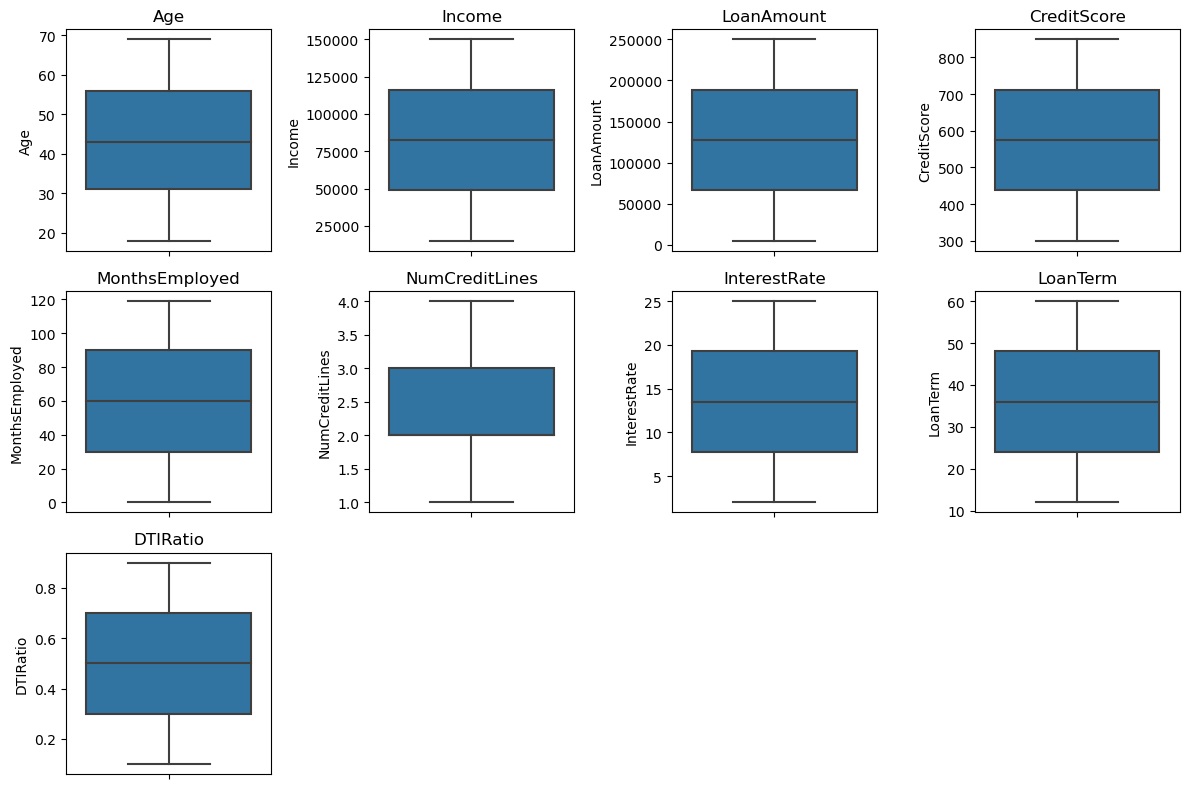

In [13]:
# Checking for OUtliers
#numerical_columns = loan_data.select_dtypes(include=['int64', 'float64'])
numerical_columns = loan_data._get_numeric_data()

# Dropping the 'Default' column
numerical_columns.drop('Default', axis=1, inplace=True)

# Plotting boxplots for numerical columns using for loop:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=numerical_columns[column])
    plt.title(column)
plt.tight_layout()
plt.show()

<Axes: xlabel='Default', ylabel='count'>

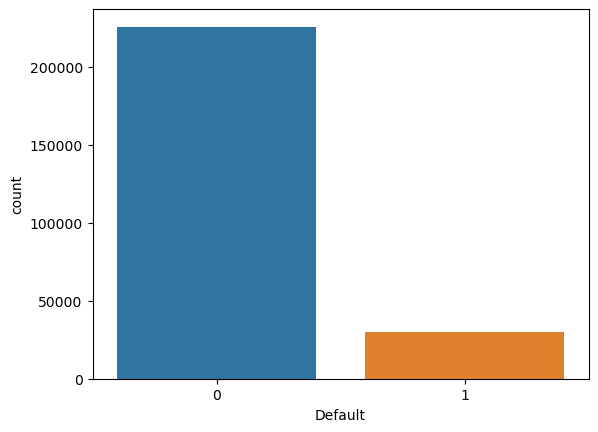

In [14]:
sns.countplot(x=loan_data['Default'], data=loan_data)

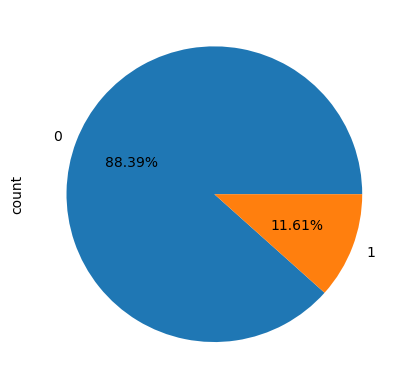

In [15]:
loan_data['Default'].value_counts().plot.pie(autopct="%.2f%%")
plt.show()

In [16]:
loan_data["Default"].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

 ### Target Variable Overview:
 1. From the result, there is a great disparity between the values of Non-Defaulters and Defaulters.
 2. With the ratio between Non-Defaulters and Defaulters being about 9:1.
 3. The data will have to be balanced later so as to eliminate bias during modelling.

In [17]:
numerical_columns = loan_data._get_numeric_data()
correlation_matrix = numerical_columns.corr()

print(correlation_matrix)

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Default        -0.167783 -0.099119    0.086659    -0.034166       -0.097374   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio   Default  
Age                  -0.000890     -0.001127  0.00026

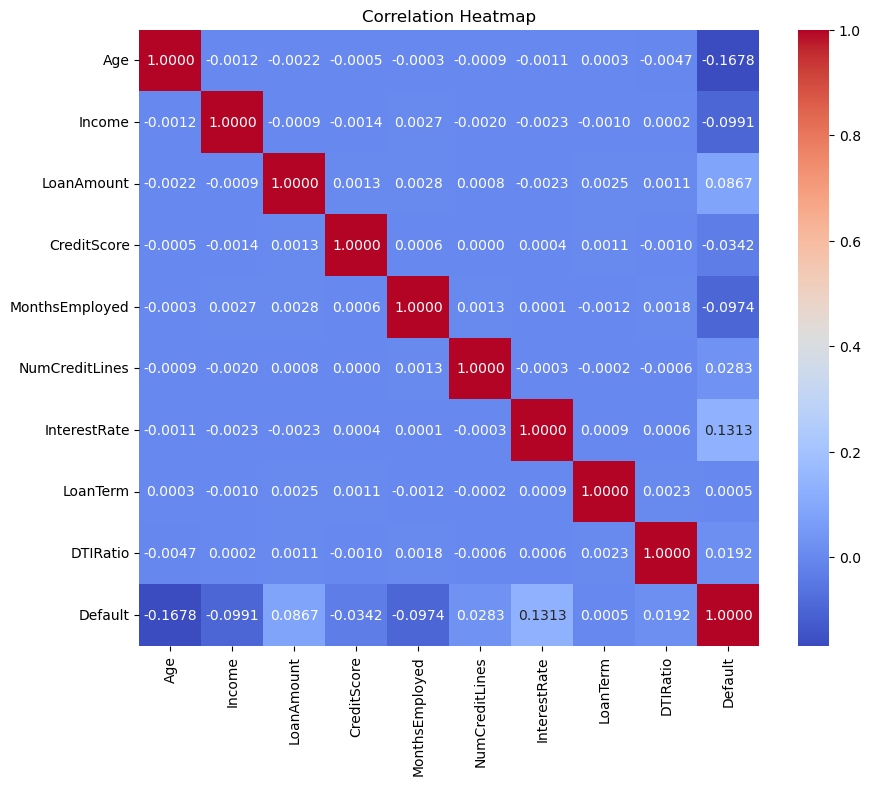

In [18]:
#Plotting the Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap')
plt.show()

### Correlation Matrix Overview:
1. **Age and Default:** There is a negative correlation (-0.17) between age and default. This result suggests that older individuals may be less likely to default on paying back their loan compared to younger individuals.
2. **Income and Default:** There is a negative correlation (-0.10) between income and default. This result also suggest  that higher income individuals may be less likely to default on paying back their loan.
3. **LoanAmount and Default:** There is a positive correlation (0.09) between loan amount and default. This result highlights that person(s) with larger loan amounts may be more likely to default.
4. **MonthsEmployed and Default:** There is a negative correlation (-0.10) between the number of months employed and default. This result also highlights that person(s) who have been employed for a longer period may be less likely to default.
5. **InterestRate and Default:** There is a positive correlation (0.13) between interest rate and default. The result shows that person(s) with loans that has higher interest rates are more likely to default.
6. **Other Correlations:** The result of other pairs of variables such as credit score and default, DTI ratio and default, loan term and default etc shows weak or non-existence correlation. Though, they may provide additional insights but are not as strong as the previous 5 mentioned above.

In [19]:
from scipy.stats import pearsonr

X = numerical_columns.values
y = loan_data['Default']

# Getting column names
column_names = numerical_columns.columns

# Calculating correlation coefficients and p-values
correlation_coefs = []
p_values = []

for i in range(X.shape[1]):
    corr_coef, p_value = pearsonr(X[:, i], y)
    correlation_coefs.append(corr_coef)
    p_values.append(p_value)

# Defining significance level
alpha = 0.05

# Interpreting the results
for i in range(len(correlation_coefs)):
    if p_values[i] < alpha:
        print(f"Variable '{column_names[i]}': Correlation coefficient = {correlation_coefs[i]}, p-value = {p_values[i]} (statistically significant)")
    else:
        print(f"Variable '{column_names[i]}': Correlation coefficient = {correlation_coefs[i]}, p-value = {p_values[i]} (not statistically significant)")


Variable 'Age': Correlation coefficient = -0.16778316487134323, p-value = 0.0 (statistically significant)
Variable 'Income': Correlation coefficient = -0.09911948445660468, p-value = 0.0 (statistically significant)
Variable 'LoanAmount': Correlation coefficient = 0.08665917723783709, p-value = 0.0 (statistically significant)
Variable 'CreditScore': Correlation coefficient = -0.03416649376077089, p-value = 7.92442171110111e-67 (statistically significant)
Variable 'MonthsEmployed': Correlation coefficient = -0.09737382897016986, p-value = 0.0 (statistically significant)
Variable 'NumCreditLines': Correlation coefficient = 0.028329721809228672, p-value = 1.6808561555377811e-46 (statistically significant)
Variable 'InterestRate': Correlation coefficient = 0.1312730152798975, p-value = 0.0 (statistically significant)
Variable 'LoanTerm': Correlation coefficient = 0.0005446976963166564, p-value = 0.7831283154536466 (not statistically significant)
Variable 'DTIRatio': Correlation coefficient 

In [20]:
loan_data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

### Encoding the Categorial Variables

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
loan_data.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [9]:
categorical_cols = loan_data.select_dtypes(include='object')
categorical_cols.head(5)

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,I38PQUQS96,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,HPSK72WA7R,Master's,Full-time,Married,No,No,Other,Yes
2,C1OZ6DPJ8Y,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,V2KKSFM3UN,High School,Full-time,Married,No,No,Business,No
4,EY08JDHTZP,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [10]:
cols_to_encode = categorical_cols.drop("LoanID", axis=1)

for i in cols_to_encode:
    loan_data[i] = le.fit_transform(loan_data[i].astype(str))

In [11]:
loan_data.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


### Feature Selection

Feature Bachelor's: 14.951165643168043
Feature High School: 99.79512530748741
Feature Master's: 34.000519772450225
Feature PhD: 65.27217183282153
Feature Full-time: 286.53037634815223
Feature Part-time: 7.7622076392449495
Feature Self-employed: 1.4113477640193972
Feature Unemployed: 234.0409966641861
Feature Divorced: 70.11241793931728
Feature Married: 122.81392978662701
Feature Single: 7.4347878806045875
Feature NoMortgage: 66.69915332088995
Feature YesMortgage: 66.6954964831412
Feature NoDependent: 153.61590010416927
Feature HasDependent: 153.4511510137039
Feature Auto: 3.574189142899067
Feature Business: 25.420604376448697
Feature Education: 2.520802569993371
Feature Home: 94.88767974544567
Feature Other: 1.530948922090167
Feature NoCosigner: 195.3166349091519
Feature HasCosigner: 195.23251328974442
Feature Education: 111.53031386916382
Feature EmploymentType: 357.41599446017455
Feature MaritalStatus: 10.619979967653217
Feature HasMortgage: 66.6954964831412
Feature HasDependents: 15

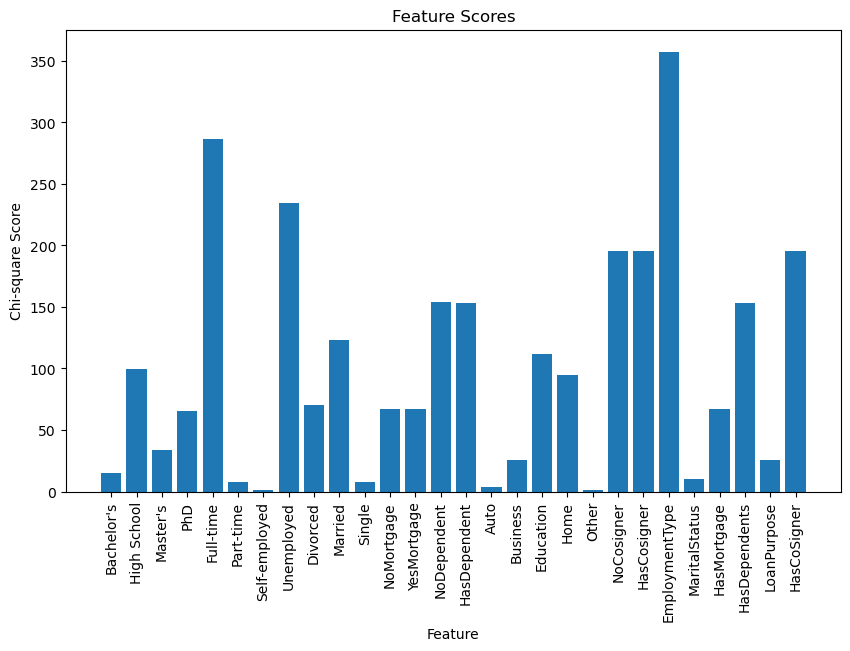

In [41]:
#making a copy of the loan data into x_cat_var
x_cat_var = df.copy()
x_cat_var.drop('LoanID', axis=1, inplace=True)

#Selecting all columns who are of object datatypes and getting the target variable out
x_cat = x_cat_var.select_dtypes(include='object')
y_cat = x_cat_var['Default']

#Creating dummy variables so as to get all the elements in each variables out
x_cat_edu = pd.get_dummies(x_cat['Education'])
x_cat_emp = pd.get_dummies(x_cat['EmploymentType'])
x_cat_marstat = pd.get_dummies(x_cat['MaritalStatus'])
x_cat_mort = pd.get_dummies(x_cat['HasMortgage'])
x_cat_dep = pd.get_dummies(x_cat['HasDependents'])
x_cat_lp = pd.get_dummies(x_cat['LoanPurpose'])
x_cat_cosign = pd.get_dummies(x_cat['HasCoSigner'])

#Renaming some of the columns
x_cat_mort.rename(columns={'No':'NoMortgage', 'Yes':'YesMortgage'}, inplace=True)
x_cat_dep.rename(columns={'No':'NoDependent', 'Yes':'HasDependent'}, inplace=True)
x_cat_cosign.rename(columns={'No':'NoCosigner', 'Yes':'HasCosigner'}, inplace=True)

#Encoding the categorical variables therein
for col in x_cat.columns:
    # Apply label encoding to each column
    x_cat[col] = le.fit_transform(x_cat[col])

# Combining the dummy variables to the categorical variables
x_cat_dum = pd.concat([x_cat_edu,x_cat_emp,x_cat_marstat,x_cat_mort,x_cat_dep,x_cat_lp, x_cat_cosign, x_cat], axis=1)

#Checking the impact of each element on the target variable using chi
from sklearn.feature_selection import SelectKBest #Kbest is used to select the best features
from sklearn.feature_selection import chi2 #Chi2 is used for scoring 

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_cat_dum, y_cat)

# Print scores with column names
feature_scores = list(zip(x_cat_dum.columns, fs.scores_))
for feature, score in feature_scores:
    print('Feature {}: {}'.format(feature, score))

# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar(x_cat_dum.columns, fs.scores_)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Chi-square Score')
plt.title('Feature Scores')
plt.show()

In [32]:
#Separating the Dependent Variable(y) from Independent Variables(x)
x = loan_data.drop(["Default", "LoanID"], axis=1)
y = loan_data["Default"]

In [33]:
x.tail()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No
255346,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes


In [84]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

In [45]:
x.shape

(255347, 16)

In [46]:
y.shape

(255347,)

### 1. Univariate Feature Selection

In [47]:
from sklearn.feature_selection import SelectKBest #Kbest is used to select the best features
from sklearn.feature_selection import chi2 #Chi2 is used for scoring 

# Using Kbest to select the top 12 best features
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(x, y)
scores = pd.DataFrame(fit.scores_, columns=["Score"])
features = pd.DataFrame(x.columns, columns=["Feature Name"])

# Combining feature names and their scores into a DataFrame
feature_scores = pd.concat([features, scores], axis=1)

# Sorting features by score in descending order
top_features = feature_scores.sort_values(by="Score", ascending=False)

# Printing the top features with their scores
print(top_features)

      Feature Name         Score
2       LoanAmount  7.543019e+07
1           Income  4.616384e+07
4   MonthsEmployed  4.880122e+04
0              Age  3.713400e+04
6     InterestRate  1.436314e+04
3      CreditScore  1.310651e+04
10  EmploymentType  3.574160e+02
15     HasCoSigner  1.952325e+02
13   HasDependents  1.534512e+02
9        Education  1.115303e+02
5   NumCreditLines  1.022384e+02
12     HasMortgage  6.669550e+01
14     LoanPurpose  2.596833e+01
11   MaritalStatus  1.061998e+01
8         DTIRatio  1.007196e+01
7         LoanTerm  6.055566e-01


### 2. Feature Importance

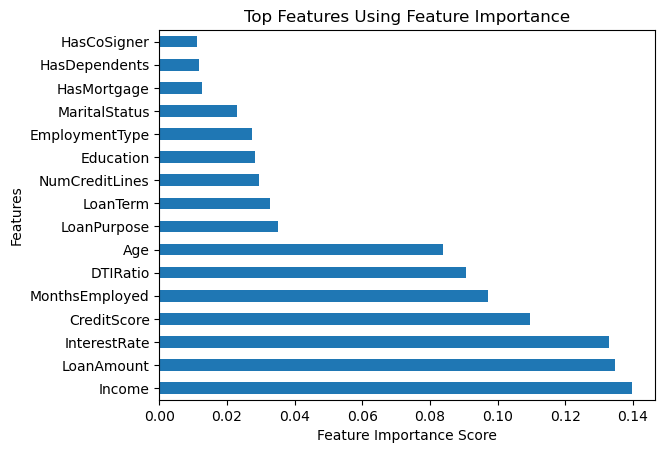

In [48]:
#Importing DecisionTreeClassifier and Training it to do Feature Importance
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x,y)


#Getting the Feature Importance Result
feat_imp_result = pd.Series(classifier.feature_importances_, index=x.columns)


#PLotting the top 12 result
feat_imp_result.nlargest(18).plot(kind="barh")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Features Using Feature Importance")
plt.show()

### Data Normalization/Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [21]:
# Scaling the dataset:
cols_to_scale = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']


x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])  # Scaling the column

# Now x contains scaled values for all columns
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0,0,0,1,1,4,1
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,2,0,1,0,0,4,1
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,2,3,0,1,1,0,0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,1,0,1,0,0,1,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0,3,0,0,1,0,0


In [22]:
x.shape

(255347, 16)

### Splitting the data set to Train and Test

In [23]:
from sklearn.model_selection import train_test_split
X_train_unb, X_test_unb, y_train_unb, y_test_unb = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
y_train_unb.value_counts()

Default
0    180555
1     23722
Name: count, dtype: int64

In [25]:
print("Proportion of Minority Class in train set: " + str(round(y_train_unb.sum()/len(y_train_unb) * 100, 2)) + "%")
print("Proportion of Minority Class in test set: " + str(round(y_test_unb.sum()/len(y_test_unb) * 100, 2)) + "%")

Proportion of Minority Class in train set: 11.61%
Proportion of Minority Class in test set: 11.61%


### Balancing the Dataset on the Train Data

In [59]:
import imblearn

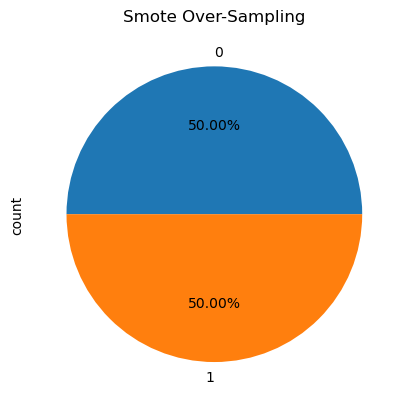

In [60]:
#Balancing the Dataset using OverSampling SMOTE Strategy
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='auto', random_state=42)
X_oversam, Y_oversam = oversample.fit_resample(X_train_unb, y_train_unb)

plot = Y_oversam.value_counts().plot.pie(autopct="%.2f%%")
plot.set_title("Smote Over-Sampling")
plt.show()

In [61]:
Y_oversam.value_counts()

Default
0    180555
1    180555
Name: count, dtype: int64

In [62]:
X_oversam.shape

(361110, 16)

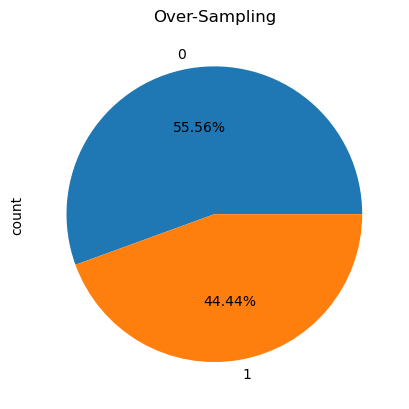

In [63]:
# Balancing Data Using RandomOverSampler and RandomUnderSampler
# The advantage it has over SMOTE is that the Sampling Strategy can be adjusted at will to see its performance during model training
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=0.8, random_state=42)
X_rand, Y_rand = ros.fit_resample(X_train_unb, y_train_unb)

plot = Y_rand.value_counts().plot.pie(autopct="%.2f%%")
plot_title = plot.set_title("Over-Sampling")

In [64]:
Y_rand.value_counts()

Default
0    180555
1    144444
Name: count, dtype: int64

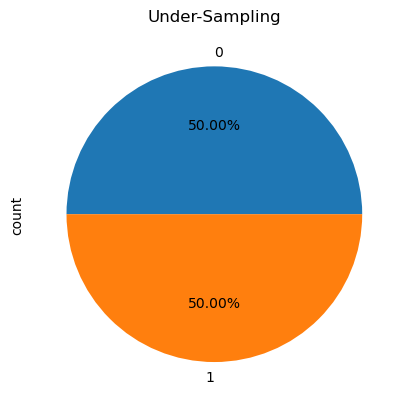

In [65]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_hybrid, Y_hybrid = rus.fit_resample(X_rand, Y_rand)

plot = Y_hybrid.value_counts().plot.pie(autopct="%.2f%%")
plot_title = plot.set_title("Under-Sampling")

In [66]:
Y_hybrid.value_counts()

Default
0    144444
1    144444
Name: count, dtype: int64

In [67]:
X_hybrid.shape

(288888, 16)

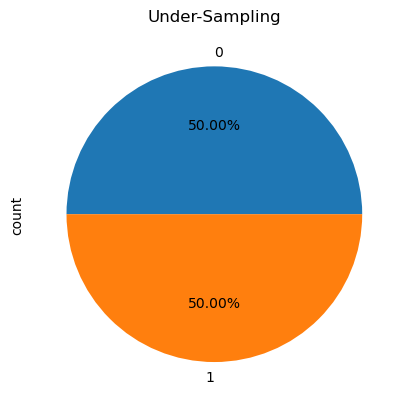

In [68]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_undersam, Y_undersam = rus.fit_resample(X_train_unb, y_train_unb)

plot = Y_undersam.value_counts().plot.pie(autopct="%.2f%%")
plot_title = plot.set_title("Under-Sampling")

In [69]:
Y_undersam.value_counts()

Default
0    23722
1    23722
Name: count, dtype: int64

### Modelling

In [72]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import metrics

In [74]:
#Creating ROC Function for ROC Curve and ROC_AUC_Score
def plot_roc(y_test, probs):
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC AUC = %0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc, color='blue')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')

### Random Forest Classifier

In [61]:
# For Imbalanced Data set
classifier = RandomForestClassifier()

# Training the model
classifier.fit(X_train_unb, y_train_unb)

# Predicting the model
y_pred = classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Random Forest Classifier is:", round(metrics.accuracy_score(y_pred, y_test_unb) *100,2), "%")
print("Precision of Random Forest Classifier is:", round(metrics.precision_score(y_pred, y_test_unb) *100,2), "%")
print("Recall_score of RFC is:", round(metrics.recall_score(y_pred, y_test_unb) *100,2), "%")
print("F1_score of RFC is:", round(metrics.f1_score(y_pred, y_test_unb) *100,2), "%")

Accuracy of Random Forest Classifier is: 88.56 %
Precision of Random Forest Classifier is: 4.55 %
Recall_score of RFC is: 59.73 %
F1_score of RFC is: 8.46 %


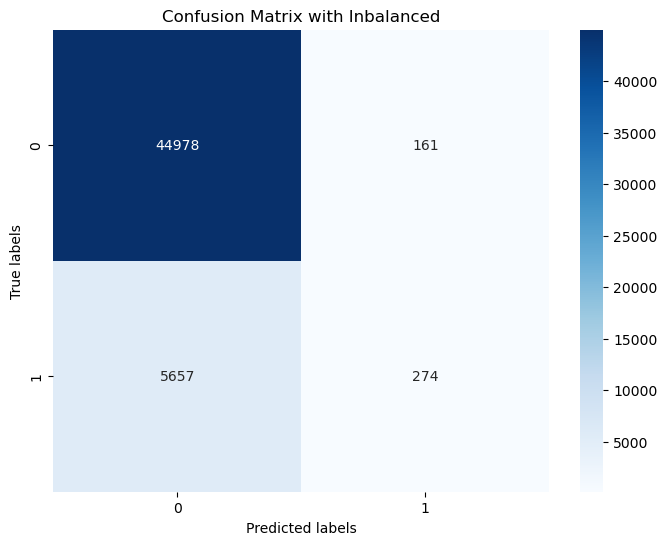

In [77]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred)


# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Inbalanced')
plt.show()

In [78]:
# For Data Balanced by SMOTE OVERSAMPLING

# Training the model
classifier.fit(X_oversam, Y_oversam)

# Predicting the model
y_pred_1 = classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Random Forest Classifier using SMOTE is:", round(metrics.accuracy_score(y_pred_1, y_test_unb) *100,2), "%")
print("Precision of Random Forest Classifier using SMOTE is:", round(metrics.precision_score(y_pred_1, y_test_unb) *100,2), "%")
print("Recall_score of RFC using SMOTE is:", round(metrics.recall_score(y_pred_1, y_test_unb) *100,2), "%")
print("F1_score of RFC using SMOTE is:", round(metrics.f1_score(y_pred_1, y_test_unb) *100,2), "%")

Accuracy of Random Forest Classifier using SMOTE is: 78.74 %
Precision of Random Forest Classifier using SMOTE is: 39.29 %
Recall_score of RFC using SMOTE is: 24.3 %
F1_score of RFC using SMOTE is: 30.03 %


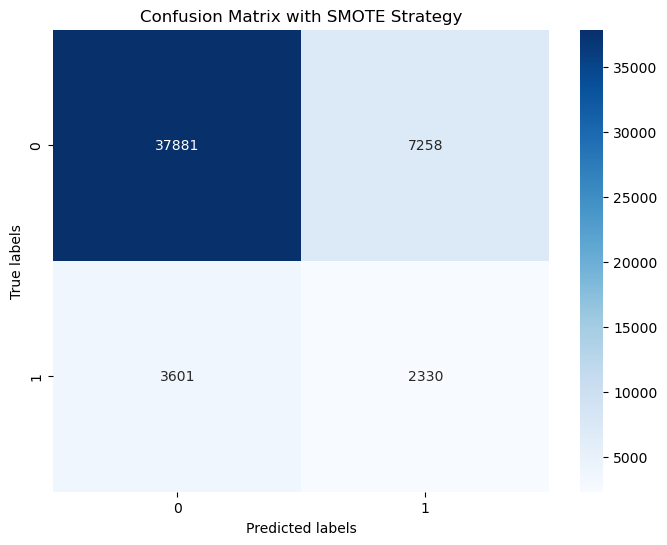

In [79]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred_1)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with SMOTE Strategy')
plt.show()

In [80]:
# For Data Balanced by HYBRID OVERSAMPLING

# Training the model
classifier.fit(X_hybrid, Y_hybrid)

# Predicting the model
y_pred_2 = classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Random Forest Classifier using HYBRID is:", round(metrics.accuracy_score(y_pred_2, y_test_unb) *100,2), "%")
print("Precision of Random Forest Classifier using HYBRID is:", round(metrics.precision_score(y_pred_2, y_test_unb) *100,2), "%")
print("Recall_score of RFC using HYBRID is:", round(metrics.recall_score(y_pred_2, y_test_unb) *100,2), "%")
print("F1_score of RFC using HYBRID is:", round(metrics.f1_score(y_pred_2, y_test_unb) *100,2), "%")

Accuracy of Random Forest Classifier using HYBRID is: 88.15 %
Precision of Random Forest Classifier using HYBRID is: 12.9 %
Recall_score of RFC using HYBRID is: 46.34 %
F1_score of RFC using HYBRID is: 20.18 %


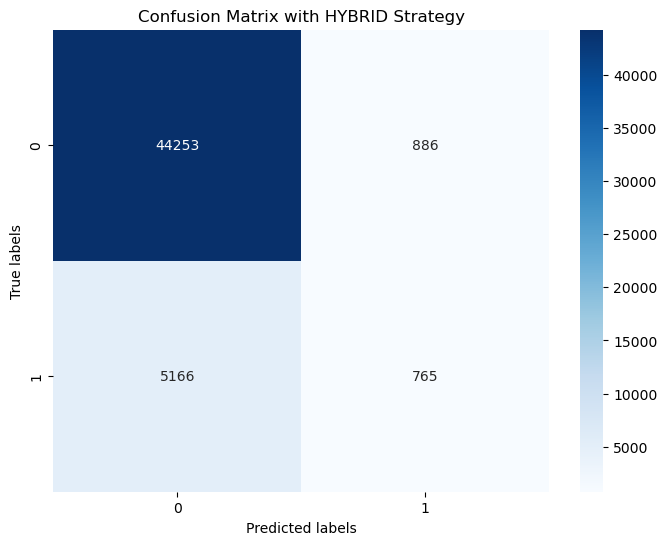

In [81]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred_2)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

In [107]:
# For data balanced by Undersampling Strategy
# Training the model
classifier.fit(X_undersam, Y_undersam)

# Predicting the model
y_pred_3 = classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Random Forest Classifier using Undersampling Strategy is:", round(metrics.accuracy_score(y_pred_3, y_test_unb) *100,2), "%")
print("Precision of Random Forest Classifier using Undersampling Strategy is:", round(metrics.precision_score(y_pred_3, y_test_unb) *100,2), "%")
print("Recall_score of RFC using Undersampling is:", round(metrics.recall_score(y_pred_3, y_test_unb) *100,2), "%")
print("F1_score of RFC using Undersampling is:", round(metrics.f1_score(y_pred_3, y_test_unb) *100,2), "%")

Accuracy of Random Forest Classifier using Undersampling Strategy is: 58.33 %
Precision of Random Forest Classifier using Undersampling Strategy is: 59.42 %
Recall_score of RFC using Undersampling is: 15.73 %
F1_score of RFC using Undersampling is: 24.88 %


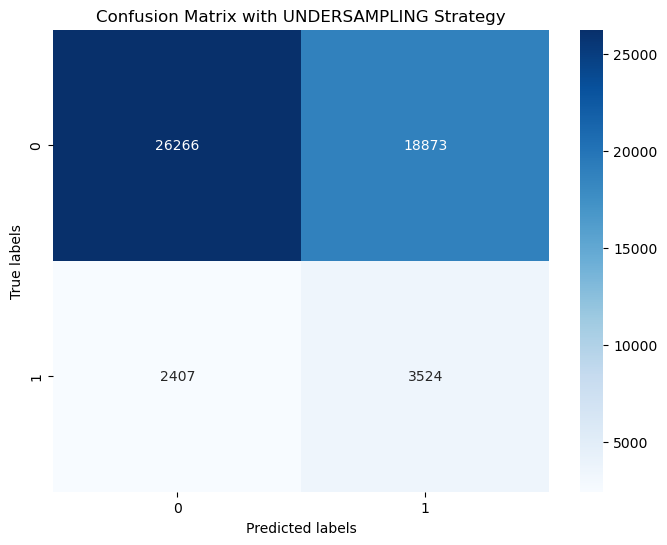

In [108]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred_3)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with UNDERSAMPLING Strategy')
plt.show()

In [84]:
# For Imbalance Dataset:
accuracy_imbal = round(metrics.accuracy_score(y_pred, y_test_unb) *100,2)
precision_imbal =  round(metrics.precision_score(y_pred, y_test_unb) *100,2)
recall_imbal = round(metrics.recall_score(y_pred, y_test_unb) *100,2)
f1_score_imbal =  round(metrics.f1_score(y_pred, y_test_unb) *100,2)

# For SMOTE Oversampling Dataset:
accuracy_smote = round(metrics.accuracy_score(y_pred_1, y_test_unb) *100,2)
precision_smote = round(metrics.precision_score(y_pred_1, y_test_unb) *100,2)
recall_smote = round(metrics.recall_score(y_pred_1, y_test_unb) *100,2)
f1_score_smote = round(metrics.f1_score(y_pred_1, y_test_unb) *100,2)

# For HYBRID Dataset:
accuracy_hybrid = round(metrics.accuracy_score(y_pred_2, y_test_unb) *100,2)
precision_hybrid = round(metrics.precision_score(y_pred_2, y_test_unb) *100,2)
recall_hybrid = round(metrics.recall_score(y_pred_2, y_test_unb) *100,2)
f1_score_hybrid = round(metrics.f1_score(y_pred_2, y_test_unb) *100,2)

# For Imbalance Dataset:
accuracy_undersam = round(metrics.accuracy_score(y_pred_3, y_test_unb) *100,2)
precision_undersam = round(metrics.precision_score(y_pred_3, y_test_unb) *100,2)
recall_undersam = round(metrics.recall_score(y_pred_3, y_test_unb) *100,2)
f1_score_undersam = round(metrics.f1_score(y_pred_3, y_test_unb) *100,2)

#Creating Dictionary:
metrics_dict = {
    'RFC Imbalance': [accuracy_imbal, precision_imbal, recall_imbal, f1_score_imbal],
    'RFC SMOTE': [accuracy_smote, precision_smote, recall_smote, f1_score_smote],
    'RFC Hybrid': [accuracy_hybrid, precision_hybrid, recall_hybrid, f1_score_hybrid],
    'RFC Undersampling': [accuracy_undersam, precision_undersam, recall_undersam, f1_score_undersam]
}

#Passing the dictionary into a dataframe:
rfc_metrics = pd.DataFrame(metrics_dict)
rfc_metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1_score']

rfc_metrics

,RFC Imbalance,RFC SMOTE,RFC Hybrid,RFC Undersampling
Accuracy,88.61,78.74,88.15,68.35
Precision,4.62,39.29,12.90,68.08
Recall,62.99,24.30,46.34,22.05
F1_score,8.61,30.03,20.18,33.32


### Decision Tree Classifier

In [85]:
#Using Inbalanced Dataset
dt_classifier = DecisionTreeClassifier()

# Training the model
dt_classifier.fit(X_train_unb, y_train_unb)

# Predicting the model
y_pred1 = dt_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Decision Tree Classifier Using Imbalanced Dataset is:", round(metrics.accuracy_score(y_pred1, y_test_unb) *100,2), "%")
print("Precision of DTC using Imbalanced Dataset is:", round(metrics.precision_score(y_pred1, y_test_unb) *100,2), "%")
print("Recall_score of DTC using Imbalanced Dataset is:", round(metrics.recall_score(y_pred1, y_test_unb) *100,2), "%")
print("F1_score of DTC using Imbalanced Dataset is:", round(metrics.f1_score(y_pred1, y_test_unb) *100,2), "%")

Accuracy of Decision Tree Classifier Using Imbalanced Dataset is: 80.36 %
Precision of DTC using Imbalanced Dataset is: 22.1 %
Recall_score of DTC using Imbalanced Dataset is: 19.5 %
F1_score of DTC using Imbalanced Dataset is: 20.72 %


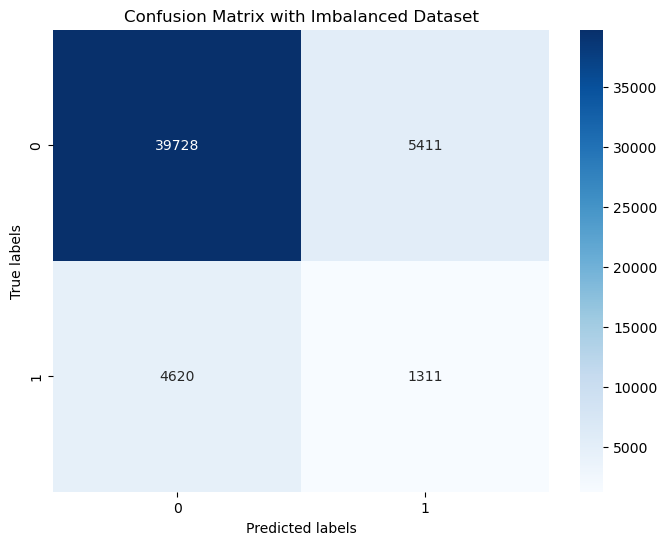

In [86]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred1)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Imbalanced Dataset')
plt.show()

In [87]:
#Using SMOTE OVERSAMPLING
dt_classifier = DecisionTreeClassifier()

# Training the model
dt_classifier.fit(X_oversam, Y_oversam)

# Predicting the model
y_pred12 = dt_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Decision Tree Classifier Using SMOTE is:", round(metrics.accuracy_score(y_pred12, y_test_unb) *100,2), "%")
print("Precision of DTC using SMOTE is:", round(metrics.precision_score(y_pred12, y_test_unb) *100,2), "%")
print("Recall_score of DTC using SMOTE is:", round(metrics.recall_score(y_pred12, y_test_unb) *100,2), "%")
print("F1_score of DTC using SMOTE is:", round(metrics.f1_score(y_pred12, y_test_unb) *100,2), "%")

Accuracy of Decision Tree Classifier Using SMOTE is: 77.39 %
Precision of DTC using SMOTE is: 26.88 %
Recall_score of DTC using SMOTE is: 18.1 %
F1_score of DTC using SMOTE is: 21.63 %


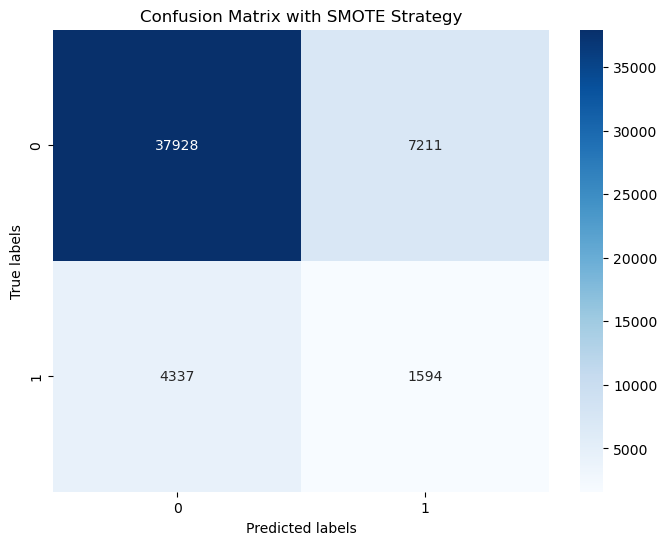

In [88]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred12)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with SMOTE Strategy')
plt.show()

In [89]:
#Using HYBRID OVERSAMPLING
dt_classifier = DecisionTreeClassifier()

# Training the model
dt_classifier.fit(X_hybrid, Y_hybrid)

# Predicting the model
y_pred13 = dt_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Decision Tree Classifier Using HYBRID is:", round(metrics.accuracy_score(y_pred13, y_test_unb) *100,2), "%")
print("Precision of DTC using HYBRID is:", round(metrics.precision_score(y_pred13, y_test_unb) *100,2), "%")
print("Recall_score of DTC using HYBRID is:", round(metrics.recall_score(y_pred13, y_test_unb) *100,2), "%")
print("F1_score of DTC using HYBRID is:", round(metrics.f1_score(y_pred13, y_test_unb) *100,2), "%")

Accuracy of Decision Tree Classifier Using HYBRID is: 79.93 %
Precision of DTC using HYBRID is: 23.45 %
Recall_score of DTC using HYBRID is: 19.58 %
F1_score of DTC using HYBRID is: 21.34 %


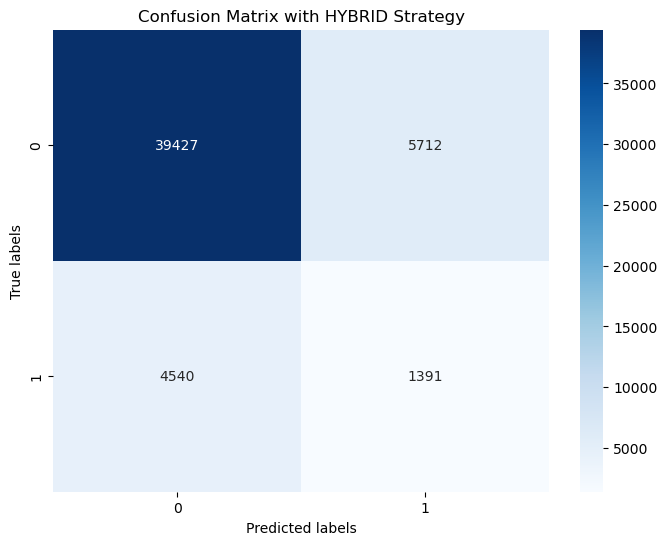

In [90]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred13)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

In [91]:
#Using UNDERSAMPLING OVERSAMPLING
dt_classifier = DecisionTreeClassifier()

# Training the model
dt_classifier.fit(X_undersam, Y_undersam)

# Predicting the model
y_pred14 = dt_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Decision Tree Classifier Using HYBRID is:", round(metrics.accuracy_score(y_pred14, y_test_unb) *100,2), "%")
print("Precision of DTC using HYBRID is:", round(metrics.precision_score(y_pred14, y_test_unb) *100,2), "%")
print("Recall_score of DTC using HYBRID is:", round(metrics.recall_score(y_pred14, y_test_unb) *100,2), "%")
print("F1_score of DTC using HYBRID is:", round(metrics.f1_score(y_pred14, y_test_unb) *100,2), "%")

Accuracy of Decision Tree Classifier Using HYBRID is: 58.22 %
Precision of DTC using HYBRID is: 59.13 %
Recall_score of DTC using HYBRID is: 15.64 %
F1_score of DTC using HYBRID is: 24.74 %


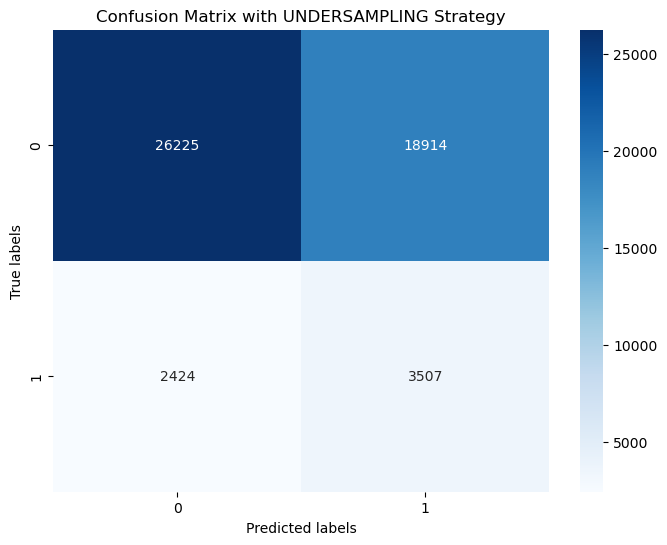

In [92]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred14)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with UNDERSAMPLING Strategy')
plt.show()

In [93]:
# For Imbalance Dataset:
accuracy_imbal = round(metrics.accuracy_score(y_pred1, y_test_unb) *100,2)
precision_imbal =  round(metrics.precision_score(y_pred1, y_test_unb) *100,2)
recall_imbal = round(metrics.recall_score(y_pred1, y_test_unb) *100,2)
f1_score_imbal =  round(metrics.f1_score(y_pred1, y_test_unb) *100,2)

# For SMOTE Oversampling Dataset:
accuracy_smote = round(metrics.accuracy_score(y_pred12, y_test_unb) *100,2)
precision_smote = round(metrics.precision_score(y_pred12, y_test_unb) *100,2)
recall_smote = round(metrics.recall_score(y_pred12, y_test_unb) *100,2)
f1_score_smote = round(metrics.f1_score(y_pred12, y_test_unb) *100,2)

# For HYBRID Dataset:
accuracy_hybrid = round(metrics.accuracy_score(y_pred13, y_test_unb) *100,2)
precision_hybrid = round(metrics.precision_score(y_pred13, y_test_unb) *100,2)
recall_hybrid = round(metrics.recall_score(y_pred13, y_test_unb) *100,2)
f1_score_hybrid = round(metrics.f1_score(y_pred13, y_test_unb) *100,2)

# For Imbalance Dataset:
accuracy_undersam = round(metrics.accuracy_score(y_pred14, y_test_unb) *100,2)
precision_undersam = round(metrics.precision_score(y_pred14, y_test_unb) *100,2)
recall_undersam = round(metrics.recall_score(y_pred14, y_test_unb) *100,2)
f1_score_undersam = round(metrics.f1_score(y_pred14, y_test_unb) *100,2)

#Creating Dictionary:
metrics_dict = {
    'DTC Imbalance': [accuracy_imbal, precision_imbal, recall_imbal, f1_score_imbal],
    'DTC SMOTE': [accuracy_smote, precision_smote, recall_smote, f1_score_smote],
    'DTC Hybrid': [accuracy_hybrid, precision_hybrid, recall_hybrid, f1_score_hybrid],
    'DTC Undersampling': [accuracy_undersam, precision_undersam, recall_undersam, f1_score_undersam]
}

#Passing the dictionary into a dataframe:
dtc_metrics = pd.DataFrame(metrics_dict)
dtc_metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1_score']

dtc_metrics

,DTC Imbalance,DTC SMOTE,DTC Hybrid,DTC Undersampling
Accuracy,80.36,77.39,79.93,58.22
Precision,22.10,26.88,23.45,59.13
Recall,19.50,18.10,19.58,15.64
F1_score,20.72,21.63,21.34,24.74


### Naive-Bayes Classifier

In [63]:
# Using Inbalanced Dataset

nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_train_unb, y_train_unb)

# Ppredicting the model
y_pred2 = nb_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Naive-Bayes Classifier Using Imbalanced Dataset is:", round(metrics.accuracy_score(y_pred2, y_test_unb) *100,2), "%")
print("Precision of Naive-Bayes Classifier Using Imbalanced Dataset is:", round(metrics.precision_score(y_pred2, y_test_unb) *100,2), "%")
print("Recall_score of Naive-Bayes Classifier Using Imbalanced Dataset is:", round(metrics.recall_score(y_pred2, y_test_unb) *100,2), "%")
print("F1_score of Naive-Bayes Classifier Using Imbalanced Dataset is:", round(metrics.f1_score(y_pred2, y_test_unb) *100, 2), "%")

Accuracy of Naive-Bayes Classifier Using Imbalanced Dataset is: 88.47 %
Precision of Naive-Bayes Classifier Using Imbalanced Dataset is: 1.5 %
Recall_score of Naive-Bayes Classifier Using Imbalanced Dataset is: 65.44 %
F1_score of Naive-Bayes Classifier Using Imbalanced Dataset is: 2.93 %


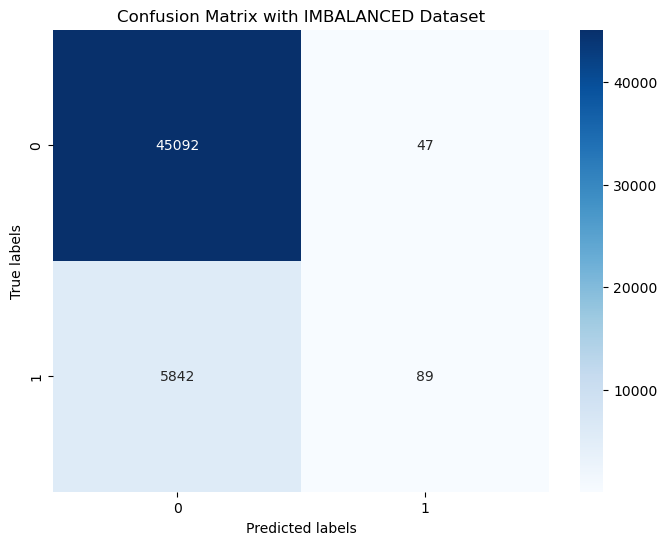

In [64]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred2)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with IMBALANCED Dataset')
plt.show()

In [65]:
# Using SMOTE Oversampling Dataset

nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_oversam, Y_oversam)

# Ppredicting the model
y_pred22 = nb_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of Naive-Bayes Classifier Using SMOTE is:", round(metrics.accuracy_score(y_pred22, y_test_unb) *100,2), "%")
print("Precision of Naive-Bayes Classifier Using SMOTE is:", round(metrics.precision_score(y_pred22, y_test_unb) *100,2), "%")
print("Recall_score of Naive-Bayes Classifier Using SMOTE is:", round(metrics.recall_score(y_pred22, y_test_unb) *100,2), "%")
print("F1_score of Naive-Bayes Classifier Using SMOTE is:", round(metrics.f1_score(y_pred22, y_test_unb) *100, 2), "%")

Accuracy of Naive-Bayes Classifier Using SMOTE is: 68.88 %
Precision of Naive-Bayes Classifier Using SMOTE is: 65.3 %
Recall_score of Naive-Bayes Classifier Using SMOTE is: 21.87 %
F1_score of Naive-Bayes Classifier Using SMOTE is: 32.77 %


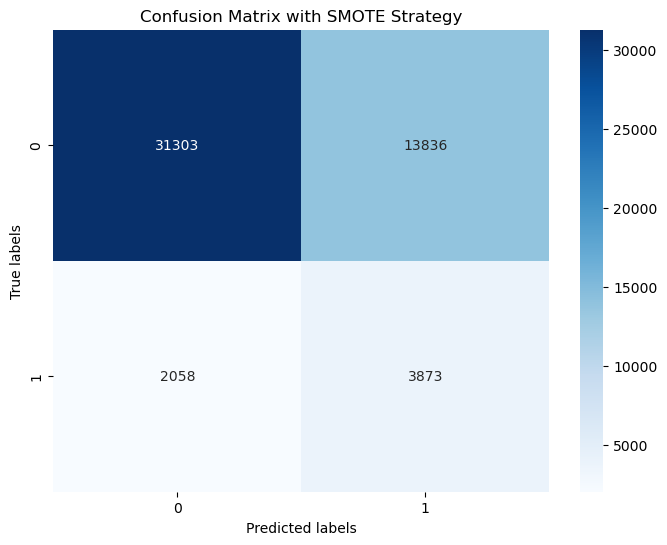

In [66]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred22)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with SMOTE Strategy')
plt.show()

In [85]:
# Using Hybrid Dataset

nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_hybrid, Y_hybrid)

# Ppredicting the model
y_pred23 = nb_classifier.predict(X_test_unb)
y_probs1 = nb_classifier.predict_proba(X_test_unb) [:, 1]

# The result of the model
print("Accuracy of Naive-Bayes Classifier Using HYBRID is:", round(metrics.accuracy_score(y_pred23, y_test_unb) *100,2), "%")
print("Precision of Naive-Bayes Classifier Using HYBRID is:", round(metrics.precision_score(y_pred23, y_test_unb) *100,2), "%")
print("Recall_score of Naive-Bayes Classifier Using HYBRID is:", round(metrics.recall_score(y_pred23, y_test_unb) *100,2), "%")
print("F1_score of Naive-Bayes Classifier Using HYBRID is:", round(metrics.f1_score(y_pred23, y_test_unb) *100, 2), "%")

Accuracy of Naive-Bayes Classifier Using HYBRID is: 66.93 %
Precision of Naive-Bayes Classifier Using HYBRID is: 70.65 %
Recall_score of Naive-Bayes Classifier Using HYBRID is: 21.67 %
F1_score of Naive-Bayes Classifier Using HYBRID is: 33.16 %


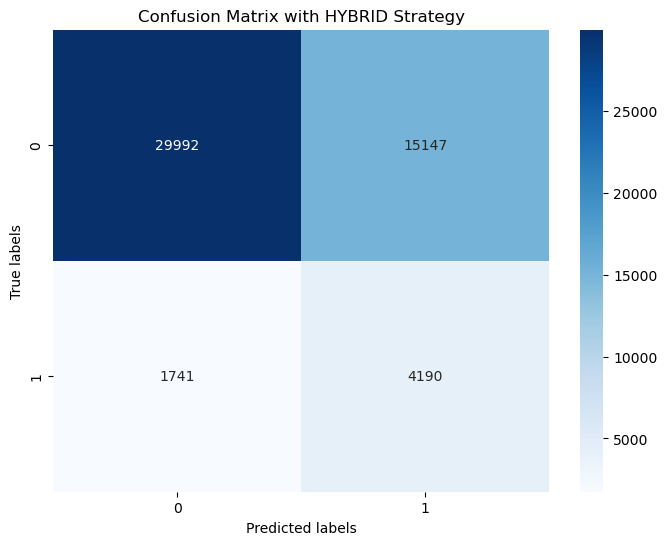

In [86]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred23)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

ROC AUC = 0.75


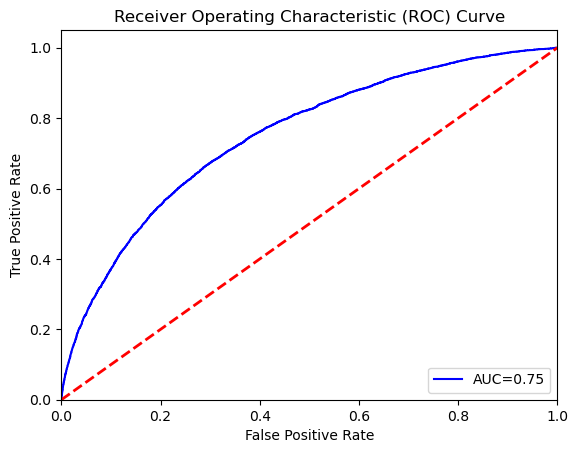

In [87]:
plot_roc(y_test_unb, y_probs1)

In [88]:
# Using Undersampling Dataset

nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_undersam, Y_undersam)

# Ppredicting the model
y_pred24 = nb_classifier.predict(X_test_unb)
y_probs2 = nb_classifier.predict_proba(X_test_unb) [:, 1]

# The result of the model
print("Accuracy of Naive-Bayes Classifier Using UNDERSAMPLING is:", round(metrics.accuracy_score(y_pred24, y_test_unb) *100,2), "%")
print("Precision of Naive-Bayes Classifier Using UNDERSAMPLING is:", round(metrics.precision_score(y_pred24, y_test_unb) *100,2), "%")
print("Recall_score of Naive-Bayes Classifier Using UNDERSAMPLING is:", round(metrics.recall_score(y_pred24, y_test_unb) *100,2), "%")
print("F1_score of Naive-Bayes Classifier Using UNDERSAMPLING is:", round(metrics.f1_score(y_pred24, y_test_unb) *100, 2), "%")

Accuracy of Naive-Bayes Classifier Using UNDERSAMPLING is: 66.96 %
Precision of Naive-Bayes Classifier Using UNDERSAMPLING is: 70.48 %
Recall_score of Naive-Bayes Classifier Using UNDERSAMPLING is: 21.66 %
F1_score of Naive-Bayes Classifier Using UNDERSAMPLING is: 33.13 %


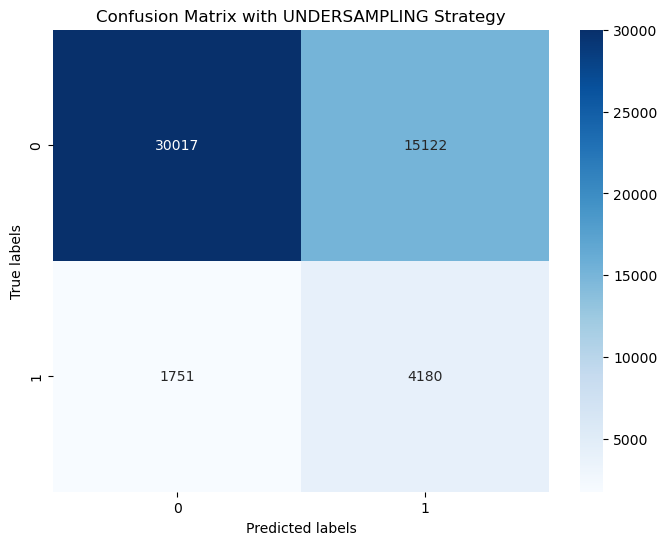

In [89]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred24)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with UNDERSAMPLING Strategy')
plt.show()

ROC AUC = 0.75


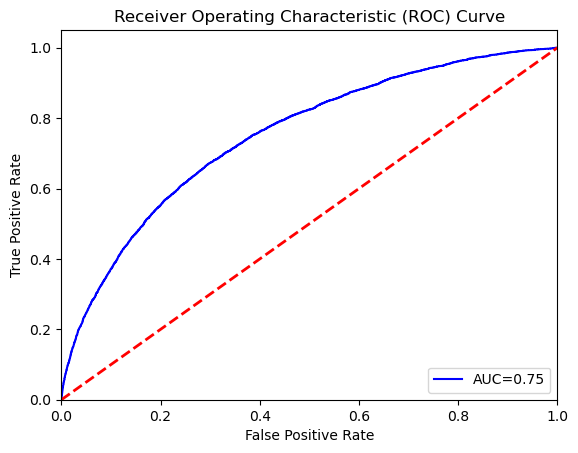

In [90]:
plot_roc(y_test_unb, y_probs2)

In [91]:
# Using Hybrid Dataset with Adjusted Threshold
nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_hybrid, Y_hybrid)

# Setting Threshold
thresholds = [0.3, 0.35, 0.4, 0.45]

for threshold in thresholds:
    # Predicting with the model using the current threshold
    y_pred = (nb_classifier.predict_proba(X_test_unb)[:,1] >= threshold).astype(int)

    # Displaying the result of the model for the current threshold
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", round(metrics.accuracy_score(y_test_unb, y_pred) * 100, 2), "%")
    print("Precision:", round(metrics.precision_score(y_test_unb, y_pred) * 100, 2), "%")
    print("Recall:", round(metrics.recall_score(y_test_unb, y_pred) * 100, 2), "%")
    print("F1 Score:", round(metrics.f1_score(y_test_unb, y_pred) * 100, 2), "%")



Threshold: 0.3
Accuracy: 38.65 %
Precision: 15.03 %
Recall: 92.02 %
F1 Score: 25.84 %

Threshold: 0.35
Accuracy: 46.28 %
Precision: 16.3 %
Recall: 87.69 %
F1 Score: 27.49 %

Threshold: 0.4
Accuracy: 53.33 %
Precision: 17.69 %
Recall: 82.63 %
F1 Score: 29.14 %

Threshold: 0.45
Accuracy: 60.46 %
Precision: 19.6 %
Recall: 77.52 %
F1 Score: 31.29 %


In [94]:
# Using Hybrid Dataset with Adjusted Threshold

nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_hybrid, Y_hybrid)

# Predicting the model
y_pred25 = (nb_classifier.predict_proba(X_test_unb)[:,1]>=0.45).astype(int)
y_probs3 = nb_classifier.predict_proba(X_test_unb) [:, 1]

# The result of the model
print(f"\nThreshold: {threshold}")
print("Accuracy of Naive-Bayes Classifier Using HYBRID is:", round(metrics.accuracy_score(y_test_unb, y_pred25) *100,2), "%")
print("Precision of Naive-Bayes Classifier Using HYBRID is:", round(metrics.precision_score(y_test_unb, y_pred25) *100,2), "%")
print("Recall_score of Naive-Bayes Classifier Using HYBRID is:", round(metrics.recall_score(y_test_unb, y_pred25) *100,2), "%")
print("F1_score of Naive-Bayes Classifier Using HYBRID is:", round(metrics.f1_score(y_test_unb, y_pred25) *100, 2), "%")
print("\n")


Threshold: 0.45
Accuracy of Naive-Bayes Classifier Using HYBRID is: 60.46 %
Precision of Naive-Bayes Classifier Using HYBRID is: 19.6 %
Recall_score of Naive-Bayes Classifier Using HYBRID is: 77.52 %
F1_score of Naive-Bayes Classifier Using HYBRID is: 31.29 %




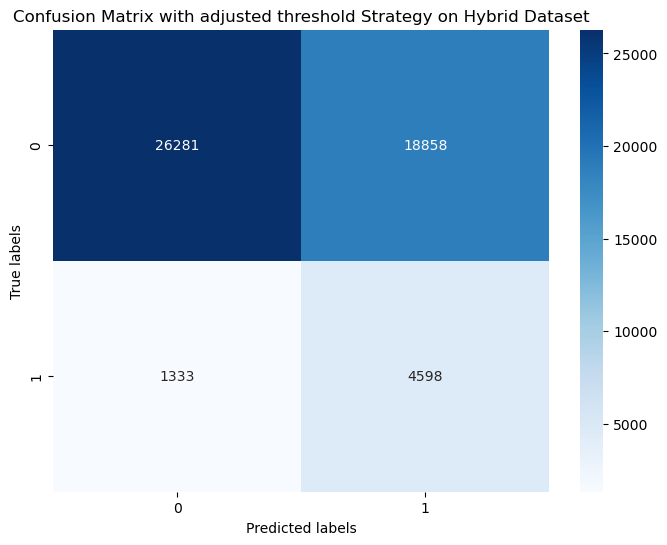

In [95]:
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred25)


# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with adjusted threshold Strategy on Hybrid Dataset')
plt.show()

ROC AUC = 0.75


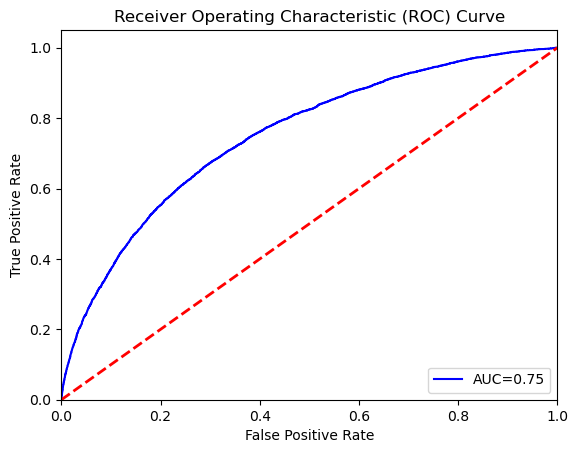

In [96]:
plot_roc(y_test_unb, y_probs3)

In [97]:
# Using undersampled Dataset with Adjusted Threshold
nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_undersam, Y_undersam)

# Setting Threshold
thresholds = [0.3, 0.35, 0.4, 0.45]

for threshold in thresholds:
    # Predicting with the model using the current threshold
    y_pred = (nb_classifier.predict_proba(X_test_unb)[:,1] >= threshold).astype(int)

    # Displaying the result of the model for the current threshold
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", round(metrics.accuracy_score(y_test_unb, y_pred) * 100, 2), "%")
    print("Precision:", round(metrics.precision_score(y_test_unb, y_pred) * 100, 2), "%")
    print("Recall:", round(metrics.recall_score(y_test_unb, y_pred) * 100, 2), "%")
    print("F1 Score:", round(metrics.f1_score(y_test_unb, y_pred) * 100, 2), "%")



Threshold: 0.3
Accuracy: 38.6 %
Precision: 15.02 %
Recall: 92.08 %
F1 Score: 25.83 %

Threshold: 0.35
Accuracy: 46.21 %
Precision: 16.28 %
Recall: 87.71 %
F1 Score: 27.47 %

Threshold: 0.4
Accuracy: 53.32 %
Precision: 17.68 %
Recall: 82.6 %
F1 Score: 29.13 %

Threshold: 0.45
Accuracy: 60.48 %
Precision: 19.6 %
Recall: 77.47 %
F1 Score: 31.29 %


In [98]:
# Using Undersampled Dataset with Adjusted Threshold

nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_undersam, Y_undersam)

# Ppredicting the model
y_pred26 = (nb_classifier.predict_proba(X_test_unb)[:,1]>=0.45).astype(int)

# The result of the model
print("Accuracy of Naive-Bayes Classifier Using HYBRID is:", round(metrics.accuracy_score(y_test_unb, y_pred26) *100,2), "%")
print("Precision of Naive-Bayes Classifier Using HYBRID is:", round(metrics.precision_score(y_test_unb, y_pred26) *100,2), "%")
print("Recall_score of Naive-Bayes Classifier Using HYBRID is:", round(metrics.recall_score(y_test_unb, y_pred26) *100,2), "%")
print("F1_score of Naive-Bayes Classifier Using HYBRID is:", round(metrics.f1_score(y_test_unb, y_pred26) *100, 2), "%")

Accuracy of Naive-Bayes Classifier Using HYBRID is: 60.48 %
Precision of Naive-Bayes Classifier Using HYBRID is: 19.6 %
Recall_score of Naive-Bayes Classifier Using HYBRID is: 77.47 %
F1_score of Naive-Bayes Classifier Using HYBRID is: 31.29 %


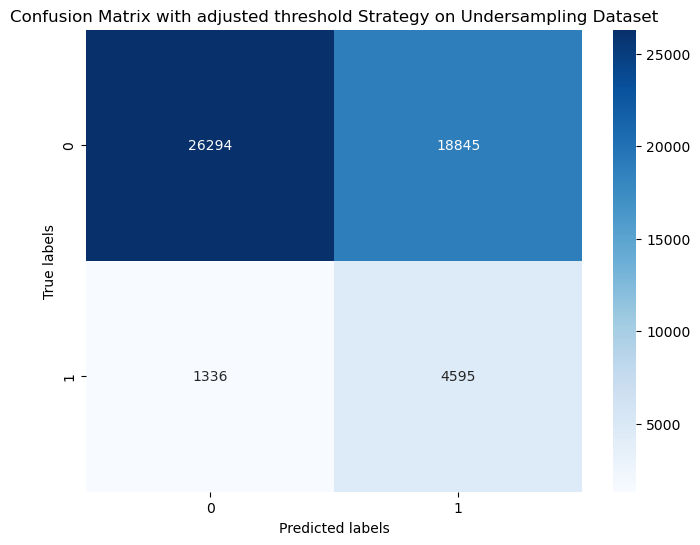

In [100]:
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred26)


# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with adjusted threshold Strategy on Undersampling Dataset')
plt.show()

ROC AUC = 0.75


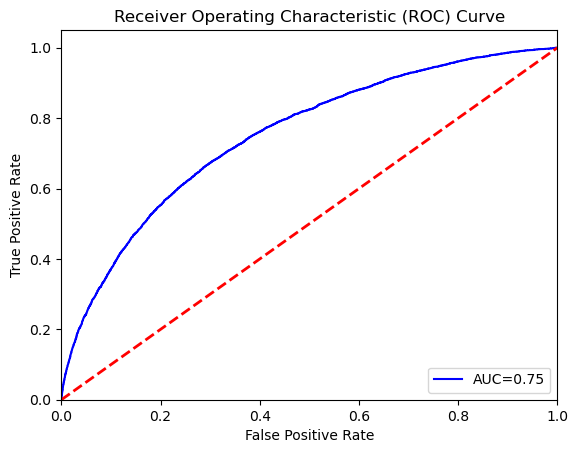

In [83]:
plot_roc(y_test_unb, y_probs)

### K Nearest Neighbor

In [218]:
# Using Imbalanced Dataset
kn_classifier = KNeighborsClassifier()

# Training the model
kn_classifier.fit(X_train_unb, y_train_unb)

# Ppredicting the model
y_pred3 = kn_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of KNeighbors Classifier Using Imbalanced Dataset is:", round(metrics.accuracy_score(y_pred3, y_test_unb) *100,2), "%")
print("Precision of KNeighbors Classifier Using Imbalanced Dataset is:", round(metrics.precision_score(y_pred3, y_test_unb) *100,2), "%")
print("Recall_score of KNeighbors Classifier Using Imbalanced Dataset is:", round(metrics.recall_score(y_pred3, y_test_unb) *100,2), "%")
print("F1_score of KNeighbors Classifier Using Imbalanced Dataset is:", round(metrics.f1_score(y_pred3, y_test_unb) *100, 2), "%")

Accuracy of KNeighbors Classifier Using Imbalanced Dataset is: 87.56 %
Precision of KNeighbors Classifier Using Imbalanced Dataset is: 4.32 %
Recall_score of KNeighbors Classifier Using Imbalanced Dataset is: 27.35 %
F1_score of KNeighbors Classifier Using Imbalanced Dataset is: 7.46 %


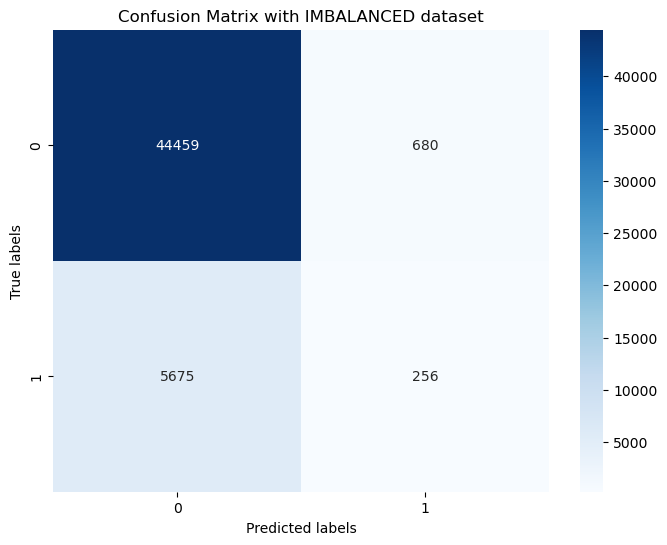

In [219]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred3)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with IMBALANCED dataset')
plt.show()

In [220]:
# Using SMOTE Oversampling
kn_classifier = KNeighborsClassifier()

# Training the model
kn_classifier.fit(X_oversam, Y_oversam)

# Ppredicting the model
y_pred32 = kn_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of KNeighbors Classifier Using SMOTE is:", round(metrics.accuracy_score(y_pred32, y_test_unb) *100,2), "%")
print("Precision of KNeighbors Classifier Using SMOTE is:", round(metrics.precision_score(y_pred32, y_test_unb) *100,2), "%")
print("Recall_score of KNeighbors Classifier Using SMOTE is:", round(metrics.recall_score(y_pred32, y_test_unb) *100,2), "%")
print("F1_score of KNeighbors Classifier Using SMOTE is:", round(metrics.f1_score(y_pred32, y_test_unb) *100, 2), "%")

Accuracy of KNeighbors Classifier Using SMOTE is: 63.74 %
Precision of KNeighbors Classifier Using SMOTE is: 48.64 %
Recall_score of KNeighbors Classifier Using SMOTE is: 15.72 %
F1_score of KNeighbors Classifier Using SMOTE is: 23.76 %


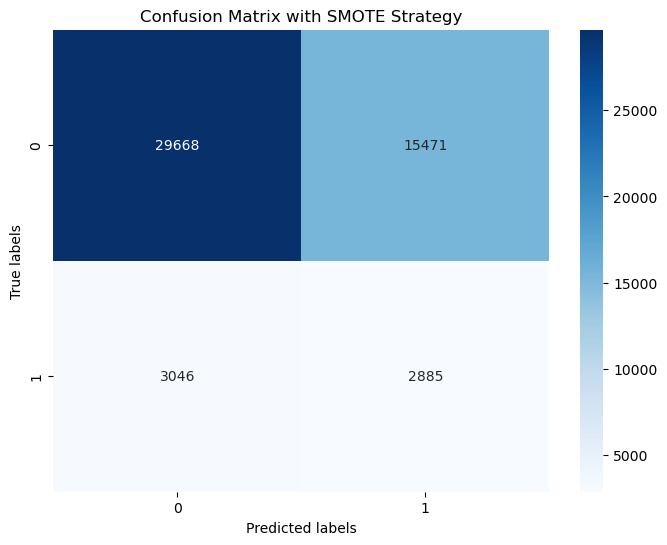

In [221]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred32)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with SMOTE Strategy')
plt.show()

In [222]:
# Using HYBRID Dataset
kn_classifier = KNeighborsClassifier()

# Training the model
kn_classifier.fit(X_hybrid, Y_hybrid)

# Ppredicting the model
y_pred33 = kn_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of KNeighbors Classifier Using HYBRID is:", round(metrics.accuracy_score(y_pred33, y_test_unb) *100,2), "%")
print("Precision of KNeighbors Classifier Using HYBRID is:", round(metrics.precision_score(y_pred33, y_test_unb) *100,2), "%")
print("Recall_score of KNeighbors Classifier Using HYBRID is:", round(metrics.recall_score(y_pred33, y_test_unb) *100,2), "%")
print("F1_score of KNeighbors Classifier Using HYBRID is:", round(metrics.f1_score(y_pred33, y_test_unb) *100, 2), "%")

Accuracy of KNeighbors Classifier Using HYBRID is: 65.86 %
Precision of KNeighbors Classifier Using HYBRID is: 44.75 %
Recall_score of KNeighbors Classifier Using HYBRID is: 15.79 %
F1_score of KNeighbors Classifier Using HYBRID is: 23.34 %


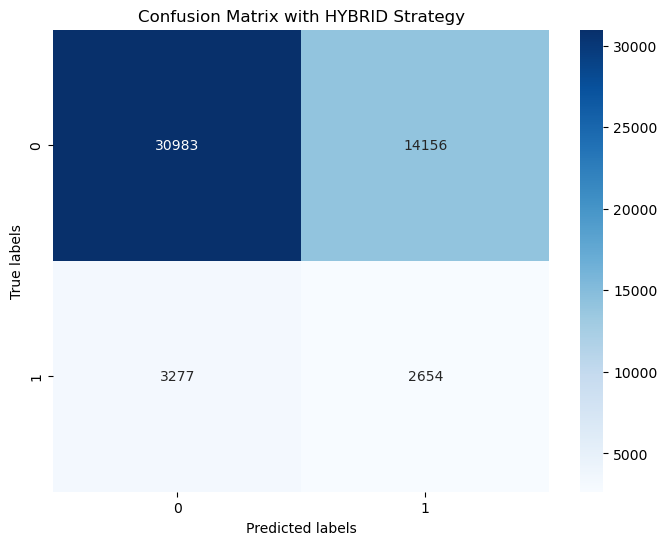

In [223]:
### Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred33)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

In [224]:
# Using UNDERSAMPLING Dataset
kn_classifier = KNeighborsClassifier()

# Training the model
kn_classifier.fit(X_undersam, Y_undersam)

# Ppredicting the model
y_pred34 = kn_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of KNeighbors Classifier Using UNDERSAMPLING is:", round(metrics.accuracy_score(y_pred34, y_test_unb) *100,2), "%")
print("Precision of KNeighbors Classifier Using UNDERSAMPLING is:", round(metrics.precision_score(y_pred34, y_test_unb) *100,2), "%")
print("Recall_score of KNeighbors Classifier Using UNDERSAMPLING is:", round(metrics.recall_score(y_pred34, y_test_unb) *100,2), "%")
print("F1_score of KNeighbors Classifier Using UNDERSAMPLING is:", round(metrics.f1_score(y_pred34, y_test_unb) *100, 2), "%")

Accuracy of KNeighbors Classifier Using UNDERSAMPLING is: 57.06 %
Precision of KNeighbors Classifier Using UNDERSAMPLING is: 59.84 %
Recall_score of KNeighbors Classifier Using UNDERSAMPLING is: 15.37 %
F1_score of KNeighbors Classifier Using UNDERSAMPLING is: 24.45 %


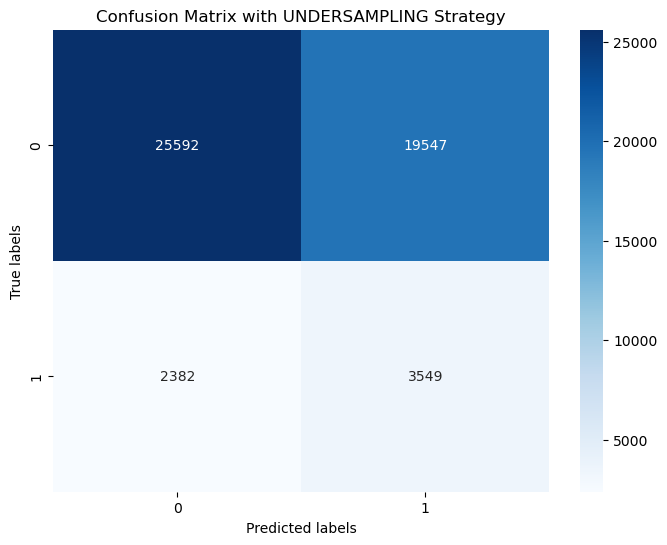

In [225]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred34)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with UNDERSAMPLING Strategy')
plt.show()

In [227]:
# For Imbalance Dataset:
accuracy_imbal = round(metrics.accuracy_score(y_pred3, y_test_unb) *100,2)
precision_imbal =  round(metrics.precision_score(y_pred3, y_test_unb) *100,2)
recall_imbal = round(metrics.recall_score(y_pred3, y_test_unb) *100,2)
f1_score_imbal =  round(metrics.f1_score(y_pred3, y_test_unb) *100,2)

# For SMOTE Oversampling Dataset:
accuracy_smote = round(metrics.accuracy_score(y_pred32, y_test_unb) *100,2)
precision_smote = round(metrics.precision_score(y_pred32, y_test_unb) *100,2)
recall_smote = round(metrics.recall_score(y_pred32, y_test_unb) *100,2)
f1_score_smote = round(metrics.f1_score(y_pred32, y_test_unb) *100,2)

# For HYBRID Dataset:
accuracy_hybrid = round(metrics.accuracy_score(y_pred33, y_test_unb) *100,2)
precision_hybrid = round(metrics.precision_score(y_pred33, y_test_unb) *100,2)
recall_hybrid = round(metrics.recall_score(y_pred33, y_test_unb) *100,2)
f1_score_hybrid = round(metrics.f1_score(y_pred33, y_test_unb) *100,2)

# For Imbalance Dataset:
accuracy_undersam = round(metrics.accuracy_score(y_pred34, y_test_unb) *100,2)
precision_undersam = round(metrics.precision_score(y_pred34, y_test_unb) *100,2)
recall_undersam = round(metrics.recall_score(y_pred34, y_test_unb) *100,2)
f1_score_undersam = round(metrics.f1_score(y_pred34, y_test_unb) *100,2)

#Creating Dictionary:
metrics_dict = {
    'KNNC Imbalance': [accuracy_imbal, precision_imbal, recall_imbal, f1_score_imbal],
    'KNNC SMOTE': [accuracy_smote, precision_smote, recall_smote, f1_score_smote],
    'KNNC Hybrid': [accuracy_hybrid, precision_hybrid, recall_hybrid, f1_score_hybrid],
    'KNNC Undersampling': [accuracy_undersam, precision_undersam, recall_undersam, f1_score_undersam]
}

#Passing the dictionary into a dataframe:
knnc_metrics = pd.DataFrame(metrics_dict)
knnc_metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1_score']

knnc_metrics

,KNNC Imbalance,KNNC SMOTE,KNNC Hybrid,KNNC Undersampling
Accuracy,87.56,63.74,65.86,57.06
Precision,4.32,48.64,44.75,59.84
Recall,27.35,15.72,15.79,15.37
F1_score,7.46,23.76,23.34,24.45


### Gradient Boosting Machine

In [60]:
# Using Imbalanced Dataset
gb_classifier = GradientBoostingClassifier()

# Training the model
gb_classifier.fit(X_train_unb, y_train_unb)

# Ppredicting the model
y_pred4 = gb_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of GradientBoosting Classifier Using Imbalanced Dataset is:", round(metrics.accuracy_score(y_pred4, y_test_unb) *100,2), "%")
print("Precision of GradientBoosting Classifier Using Imbalanced Dataset is:", round(metrics.precision_score(y_pred4, y_test_unb) *100,2), "%")
print("Recall_score of GradientBoosting Classifier Using Imbalanced Dataset is:", round(metrics.recall_score(y_pred4, y_test_unb) *100,2), "%")
print("F1_score of GradientBoosting Classifier Using Imbalanced Dataset is:", round(metrics.f1_score(y_pred4, y_test_unb) *100, 2), "%")

Accuracy of GradientBoosting Classifier Using Imbalanced Dataset is: 88.63 %
Precision of GradientBoosting Classifier Using Imbalanced Dataset is: 5.06 %
Recall_score of GradientBoosting Classifier Using Imbalanced Dataset is: 62.89 %
F1_score of GradientBoosting Classifier Using Imbalanced Dataset is: 9.36 %


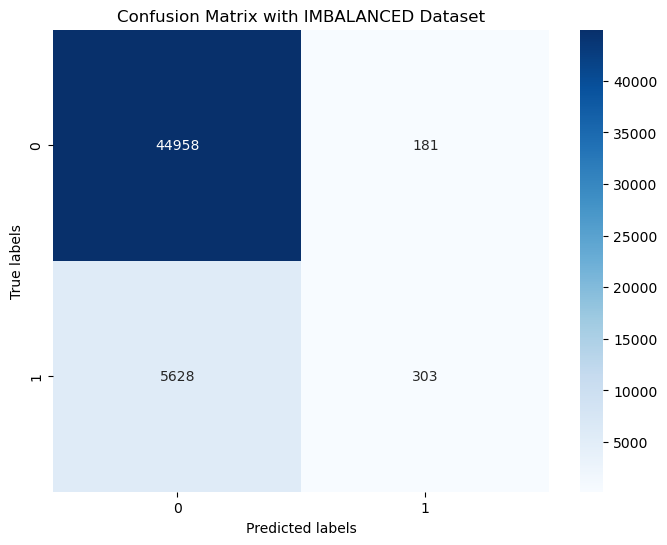

In [63]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred4)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with IMBALANCED Dataset')
plt.show()

In [64]:
# Using SMOTE Oversampling Dataset
gb_classifier = GradientBoostingClassifier()

# Training the model
gb_classifier.fit(X_oversam, Y_oversam)

# Ppredicting the model
y_pred42 = gb_classifier.predict(X_test_unb)

# The result of the model
print("Accuracy of GradientBoosting Classifier Using SMOTE is:", round(metrics.accuracy_score(y_pred42, y_test_unb) *100,2), "%")
print("Precision of GradientBoosting Classifier Using SMOTE is:", round(metrics.precision_score(y_pred42, y_test_unb) *100,2), "%")
print("Recall_score of GradientBoosting Classifier Using SMOTE is:", round(metrics.recall_score(y_pred42, y_test_unb) *100,2), "%")
print("F1_score of GradientBoosting Classifier Using SMOTE is:", round(metrics.f1_score(y_pred42, y_test_unb) *100, 2), "%")

Accuracy of GradientBoosting Classifier Using SMOTE is: 72.28 %
Precision of GradientBoosting Classifier Using SMOTE is: 54.07 %
Recall_score of GradientBoosting Classifier Using SMOTE is: 21.9 %
F1_score of GradientBoosting Classifier Using SMOTE is: 31.18 %


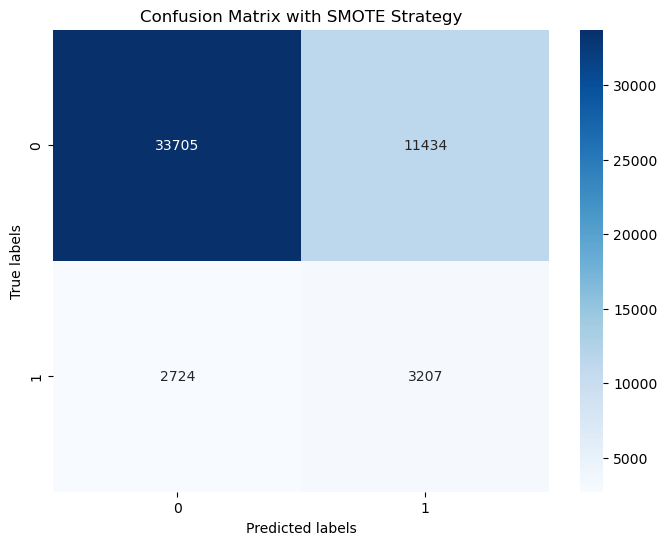

In [65]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred42)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with SMOTE Strategy')
plt.show()

In [76]:
# Using HYBRID Dataset
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the model
gb_model.fit(X_hybrid, Y_hybrid)

# Predicting the model
y_pred43 = gb_model.predict(X_test_unb)
y_probs4 = gb_model.predict_proba(X_test_unb) [:, 1]

# The result of the model
print("Accuracy of GradientBoosting Classifier Using HYBRID is:", round(metrics.accuracy_score(y_pred43, y_test_unb) *100,2), "%")
print("Precision of GradientBoosting Classifier Using HYBRID is:", round(metrics.precision_score(y_pred43, y_test_unb) *100,2), "%")
print("Recall_score of GradientBoosting Classifier Using HYBRID is:", round(metrics.recall_score(y_pred43, y_test_unb) *100,2), "%")
print("F1_score of GradientBoosting Classifier Using HYBRID is:", round(metrics.f1_score(y_pred43, y_test_unb) *100, 2), "%")

Accuracy of GradientBoosting Classifier Using HYBRID is: 68.72 %
Precision of GradientBoosting Classifier Using HYBRID is: 69.38 %
Recall_score of GradientBoosting Classifier Using HYBRID is: 22.52 %
F1_score of GradientBoosting Classifier Using HYBRID is: 34.0 %


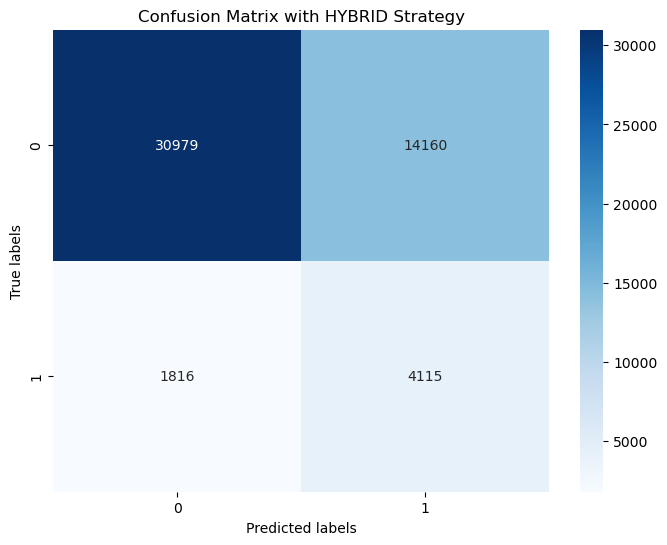

In [77]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred43)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

ROC AUC = 0.76


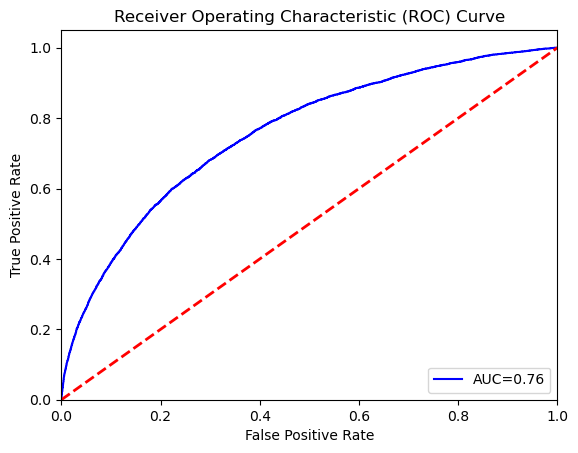

In [78]:
plot_roc(y_test_unb, y_probs4)

In [69]:
# Using UNDERSAMPLING Dataset
gb_classifier = GradientBoostingClassifier()

# Training the model
gb_classifier.fit(X_undersam, Y_undersam)

# Predicting the model
y_pred44 = gb_classifier.predict(X_test_unb)
y_probs5 = gb_classifier.predict_proba(X_test_unb) [:, 1]

# The result of the model
print("Accuracy of GradientBoosting Classifier Using UNDERSAMPLING is:", round(metrics.accuracy_score(y_pred44, y_test_unb) *100,2), "%")
print("Precision of GradientBoosting Classifier Using UNDERSAMPLING is:", round(metrics.precision_score(y_pred44, y_test_unb) *100,2), "%")
print("Recall_score of GradientBoosting Classifier Using UNDERSAMPLING is:", round(metrics.recall_score(y_pred44, y_test_unb) *100,2), "%")
print("F1_score of GradientBoosting Classifier Using UNDERSAMPLING is:", round(metrics.f1_score(y_pred44, y_test_unb) *100, 2), "%")

Accuracy of GradientBoosting Classifier Using UNDERSAMPLING is: 68.2 %
Precision of GradientBoosting Classifier Using UNDERSAMPLING is: 69.67 %
Recall_score of GradientBoosting Classifier Using UNDERSAMPLING is: 22.25 %
F1_score of GradientBoosting Classifier Using UNDERSAMPLING is: 33.73 %


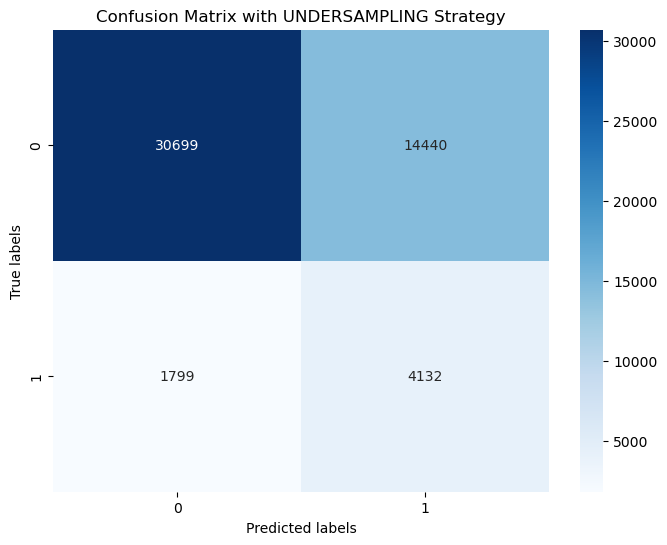

In [70]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred44)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with UNDERSAMPLING Strategy')
plt.show()

ROC AUC = 0.76


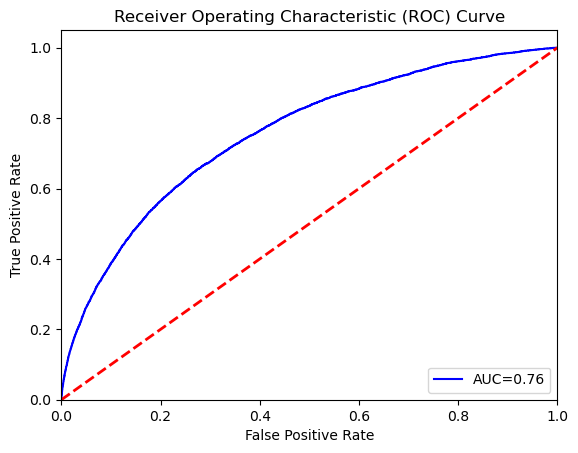

In [71]:
plot_roc(y_test_unb, y_probs5)

In [100]:
# Using Hybrid Dataset with Adjusted Threshold
gb_classifier = GradientBoostingClassifier()

# Training the model
gb_classifier.fit(X_hybrid, Y_hybrid)

# Setting Threshold
thresholds = [0.3, 0.35, 0.4, 0.45]

for threshold in thresholds:
    # Predicting with the model using the current threshold
    y_pred = (gb_classifier.predict_proba(X_test_unb)[:,1] >= threshold).astype(int)

    # Displaying the result of the model for the current threshold
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", round(metrics.accuracy_score(y_test_unb, y_pred) * 100, 2), "%")
    print("Precision:", round(metrics.precision_score(y_test_unb, y_pred) * 100, 2), "%")
    print("Recall:", round(metrics.recall_score(y_test_unb, y_pred) * 100, 2), "%")
    print("F1 Score:", round(metrics.f1_score(y_test_unb, y_pred) * 100, 2), "%")



Threshold: 0.3
Accuracy: 39.07 %
Precision: 15.09 %
Recall: 91.77 %
F1 Score: 25.92 %

Threshold: 0.35
Accuracy: 47.3 %
Precision: 16.58 %
Recall: 87.74 %
F1 Score: 27.89 %

Threshold: 0.4
Accuracy: 55.21 %
Precision: 18.36 %
Recall: 82.89 %
F1 Score: 30.06 %

Threshold: 0.45
Accuracy: 62.35 %
Precision: 20.29 %
Recall: 76.55 %
F1 Score: 32.08 %


In [102]:
# Using Hybrid Dataset with Adjusted Threshold

gb_classifier = GradientBoostingClassifier()

# Training the model
gb_classifier.fit(X_hybrid, Y_hybrid)

# Ppredicting the model
y_pred45 = (gb_classifier.predict_proba(X_test_unb)[:,1]>=0.45).astype(int)

# The result of the model
print("Accuracy of Gradient Boosting Classifier Using HYBRID is:", round(metrics.accuracy_score(y_test_unb, y_pred45) *100,2), "%")
print("Precision of Gradient Boosting Classifier Using HYBRID is:", round(metrics.precision_score(y_test_unb, y_pred45) *100,2), "%")
print("Recall_score of Gradient Boosting Classifier Using HYBRID is:", round(metrics.recall_score(y_test_unb, y_pred45) *100,2), "%")
print("F1_score of Gradient Boosting Classifier Using HYBRID is:", round(metrics.f1_score(y_test_unb, y_pred45) *100, 2), "%")

Accuracy of Gradient Boosting Classifier Using HYBRID is: 62.35 %
Precision of Gradient Boosting Classifier Using HYBRID is: 20.29 %
Recall_score of Gradient Boosting Classifier Using HYBRID is: 76.55 %
F1_score of Gradient Boosting Classifier Using HYBRID is: 32.08 %


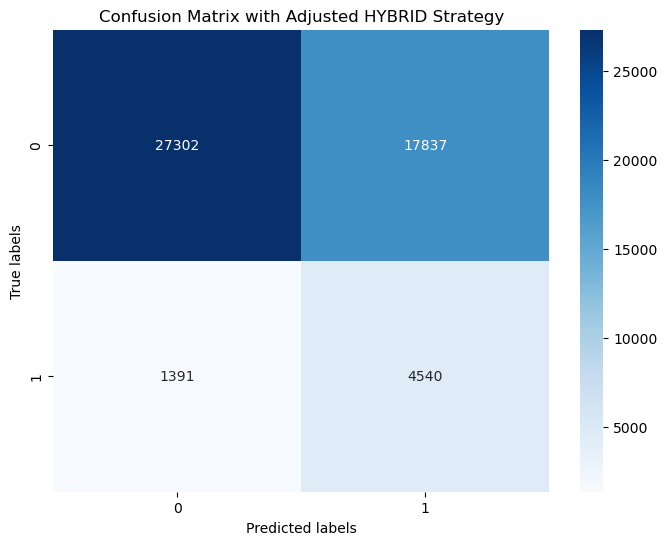

In [103]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred45)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Adjusted HYBRID Strategy')
plt.show()

In [112]:
#Testing if I can pass in the result of adjusted threshold
y_probab = (gb_classifier.predict_proba(X_test_unb)[:,1]>0.45).astype(int)

ROC AUC = 0.69


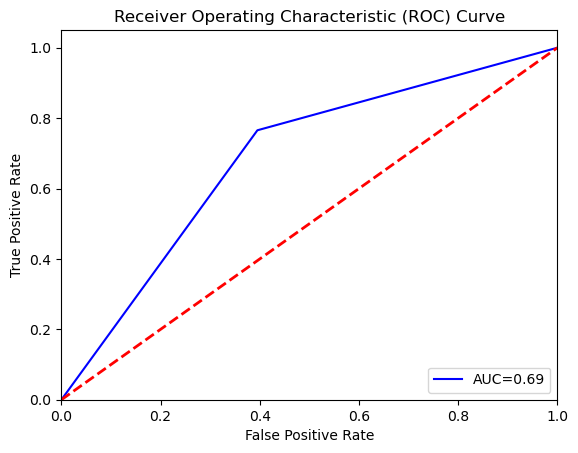

In [113]:
plot_roc(y_test_unb, y_probab)

In [130]:
# Using Hybrid Dataset with Adjusted Threshold
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Training the model
gb_classifier.fit(X_undersam, Y_undersam)

# Setting Threshold
thresholds = [0.3, 0.35, 0.4, 0.45]

for threshold in thresholds:
    # Predicting with the model using the current threshold
    y_pred = (gb_classifier.predict_proba(X_test_unb)[:,1] >= threshold).astype(int)

    # Displaying the result of the model for the current threshold
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", round(metrics.accuracy_score(y_test_unb, y_pred) * 100, 2), "%")
    print("Precision:", round(metrics.precision_score(y_test_unb, y_pred) * 100, 2), "%")
    print("Recall:", round(metrics.recall_score(y_test_unb, y_pred) * 100, 2), "%")
    print("F1 Score:", round(metrics.f1_score(y_test_unb, y_pred) * 100, 2), "%")


Threshold: 0.3
Accuracy: 40.88 %
Precision: 15.37 %
Recall: 90.79 %
F1 Score: 26.29 %

Threshold: 0.35
Accuracy: 48.44 %
Precision: 16.72 %
Recall: 86.41 %
F1 Score: 28.02 %

Threshold: 0.4
Accuracy: 55.44 %
Precision: 18.3 %
Recall: 81.91 %
F1 Score: 29.92 %

Threshold: 0.45
Accuracy: 62.04 %
Precision: 20.01 %
Recall: 75.7 %
F1 Score: 31.66 %


In [131]:
# Using Undersampling Dataset with Adjusted Threshold

gb_classifier = GradientBoostingClassifier(n_estimators=40, learning_rate=1.0, max_depth=1, random_state=0)

# Training the model
gb_classifier.fit(X_undersam, Y_undersam)

# Ppredicting the model
y_pred46 = (nb_classifier.predict_proba(X_test_unb)[:,1]>=0.45).astype(int)

# The result of the model
print("Accuracy of Gradient Boosting Classifier Using HYBRID is:", round(metrics.accuracy_score(y_test_unb, y_pred46) *100,2), "%")
print("Precision of Gradient Boosting Classifier Using HYBRID is:", round(metrics.precision_score(y_test_unb, y_pred46) *100,2), "%")
print("Recall_score of Gradient Boosting Classifier Using HYBRID is:", round(metrics.recall_score(y_test_unb, y_pred46) *100,2), "%")
print("F1_score of Gradient Boosting Classifier Using HYBRID is:", round(metrics.f1_score(y_test_unb, y_pred46) *100, 2), "%")

Accuracy of Gradient Boosting Classifier Using HYBRID is: 60.48 %
Precision of Gradient Boosting Classifier Using HYBRID is: 19.6 %
Recall_score of Gradient Boosting Classifier Using HYBRID is: 77.47 %
F1_score of Gradient Boosting Classifier Using HYBRID is: 31.29 %


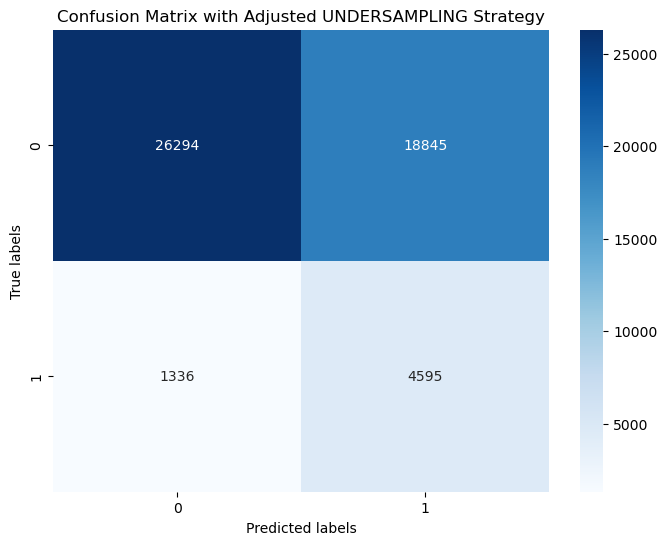

In [132]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred46)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Adjusted UNDERSAMPLING Strategy')
plt.show()

In [136]:
# For Imbalance Dataset:
accuracy_imbal = round(metrics.accuracy_score(y_pred4, y_test_unb) *100,2)
precision_imbal =  round(metrics.precision_score(y_pred4, y_test_unb) *100,2)
recall_imbal = round(metrics.recall_score(y_pred4, y_test_unb) *100,2)
f1_score_imbal =  round(metrics.f1_score(y_pred4, y_test_unb) *100,2)

# For SMOTE Oversampling Dataset:
accuracy_smote = round(metrics.accuracy_score(y_pred42, y_test_unb) *100,2)
precision_smote = round(metrics.precision_score(y_pred42, y_test_unb) *100,2)
recall_smote = round(metrics.recall_score(y_pred42, y_test_unb) *100,2)
f1_score_smote = round(metrics.f1_score(y_pred42, y_test_unb) *100,2)

# For HYBRID Dataset:
accuracy_hybrid = round(metrics.accuracy_score(y_pred43, y_test_unb) *100,2)
precision_hybrid = round(metrics.precision_score(y_pred43, y_test_unb) *100,2)
recall_hybrid = round(metrics.recall_score(y_pred43, y_test_unb) *100,2)
f1_score_hybrid = round(metrics.f1_score(y_pred43, y_test_unb) *100,2)

# For Imbalance Dataset:
accuracy_undersam = round(metrics.accuracy_score(y_pred44, y_test_unb) *100,2)
precision_undersam = round(metrics.precision_score(y_pred44, y_test_unb) *100,2)
recall_undersam = round(metrics.recall_score(y_pred44, y_test_unb) *100,2)
f1_score_undersam = round(metrics.f1_score(y_pred44, y_test_unb) *100,2)

# For Adjusted Hybrid Dataset:
accuracy_adj_hybrid = round(metrics.accuracy_score(y_test_unb, y_pred45) *100,2)
precision_adj_hybrid = round(metrics.precision_score(y_test_unb, y_pred45) *100,2)
recall_adj_hybrid = round(metrics.recall_score(y_test_unb, y_pred45) *100,2)
f1_score_adj_hybrid = round(metrics.f1_score(y_test_unb, y_pred45) *100,2)


# For Adjusted Oversampling Dataset:
accuracy_adj_undersam = round(metrics.accuracy_score(y_test_unb, y_pred46) *100,2)
precision_adj_undersam = round(metrics.precision_score(y_test_unb, y_pred46) *100,2)
recall_adj_undersam = round(metrics.recall_score(y_test_unb, y_pred46) *100,2)
f1_score_adj_undersam = round(metrics.f1_score(y_test_unb, y_pred46) *100,2)

#Creating Dictionary:
metrics_dict = {
    'GBC Imbalance': [accuracy_imbal, precision_imbal, recall_imbal, f1_score_imbal],
    'GBC SMOTE': [accuracy_smote, precision_smote, recall_smote, f1_score_smote],
    'GBC Hybrid': [accuracy_hybrid, precision_hybrid, recall_hybrid, f1_score_hybrid],
    'GBC Undersampling': [accuracy_undersam, precision_undersam, recall_undersam, f1_score_undersam],
    'GBC Hybrid Adjusted': [accuracy_adj_hybrid, precision_adj_hybrid, recall_adj_hybrid, f1_score_adj_hybrid],
    'GBC Undersampling Adjusted': [accuracy_adj_undersam, precision_adj_undersam, recall_adj_undersam, f1_score_adj_undersam]
}

#Passing the dictionary into a dataframe:
gbc_metrics = pd.DataFrame(metrics_dict)
gbc_metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1_score']

gbc_metrics

,GBC Imbalance,GBC SMOTE,GBC Hybrid,GBC Undersampling,GBC Hybrid Adjusted,GBC Undersampling Adjusted
Accuracy,88.63,87.76,68.72,68.22,53.60,53.60
Precision,5.06,13.20,69.38,69.62,17.81,17.81
Recall,62.89,41.56,22.52,22.25,82.87,82.87
F1_score,9.36,20.04,34.00,33.72,29.32,29.32


### XGBOOST Classifier

In [111]:
# Using Imbalanced Dataset
from xgboost import XGBClassifier

# Instantiate the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the resampled training data
xgb_model.fit(X_train_unb, y_train_unb)

# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test_unb)

# Evaluate the model
print("Extreme Gradient Boosting (XGBoost) Classifier:")
print("Accuracy:", round(metrics.accuracy_score(y_pred_xgb, y_test_unb) *100,2), "%")
print("Precision:", round(metrics.precision_score(y_pred_xgb, y_test_unb) *100,2), "%")
print("Recall:", round(metrics.recall_score(y_pred_xgb, y_test_unb) *100,2), "%")
print("F1 Score:", round(metrics.f1_score(y_pred_xgb, y_test_unb) *100,2), "%")

Extreme Gradient Boosting (XGBoost) Classifier:
Accuracy: 88.52 %
Precision: 7.81 %
Recall: 53.9 %
F1 Score: 13.64 %


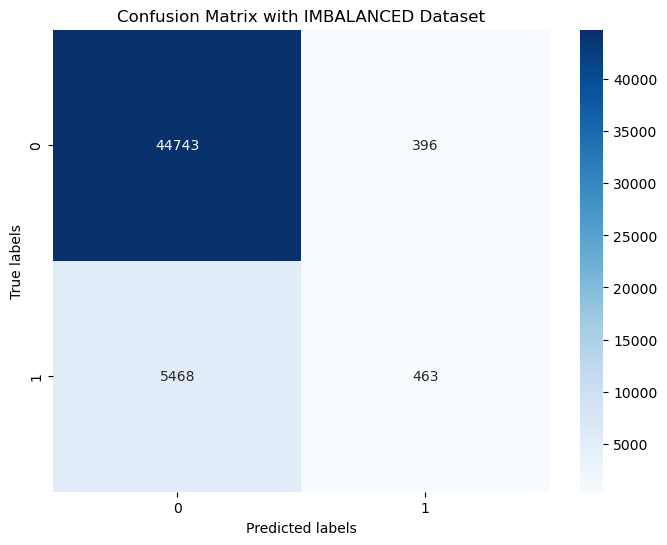

In [132]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred_xgb)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with IMBALANCED Dataset')
plt.show()

In [133]:
# Using SMOTE Oversampling Dataset

# Instantiate the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the resampled training data
xgb_model.fit(X_oversam, Y_oversam)

# Make predictions on the testing data
y_pred_xgb2 = xgb_model.predict(X_test_unb)

# Evaluate the model
print("Extreme Gradient Boosting (XGBoost) Classifier:")
print("Accuracy:", round(metrics.accuracy_score(y_pred_xgb2, y_test_unb) *100,2), "%")
print("Precision:", round(metrics.precision_score(y_pred_xgb2, y_test_unb) *100,2), "%")
print("Recall:", round(metrics.recall_score(y_pred_xgb2, y_test_unb) *100,2), "%")
print("F1 Score:", round(metrics.f1_score(y_pred_xgb2, y_test_unb) *100,2), "%")

Extreme Gradient Boosting (XGBoost) Classifier:
Accuracy: 85.21 %
Precision: 24.72 %
Recall: 32.19 %
F1 Score: 27.96 %


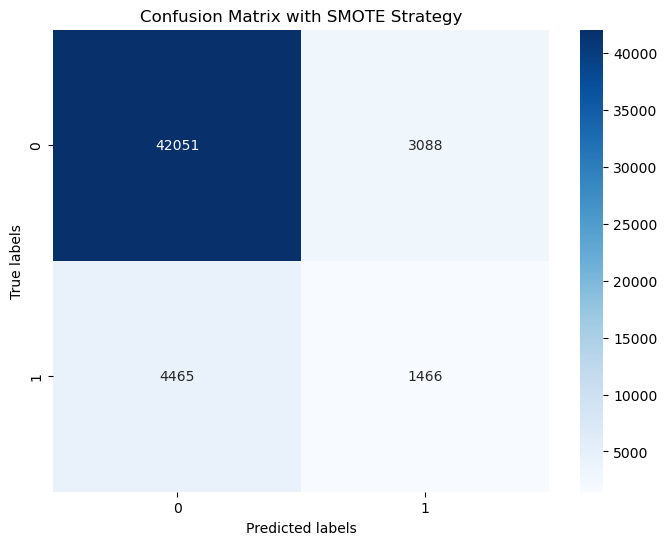

In [134]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred_xgb2)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with SMOTE Strategy')
plt.show()

In [135]:
# Using HYBRID Dataset

# Instantiate the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the resampled training data
xgb_model.fit(X_hybrid, Y_hybrid)

# Make predictions on the testing data
y_pred_xgb3 = xgb_model.predict(X_test_unb)

# Evaluate the model
print("Extreme Gradient Boosting (XGBoost) Classifier:")
print("Accuracy:", round(metrics.accuracy_score(y_pred_xgb3, y_test_unb) *100,2), "%")
print("Precision:", round(metrics.precision_score(y_pred_xgb3, y_test_unb) *100,2), "%")
print("Recall:", round(metrics.recall_score(y_pred_xgb3, y_test_unb) *100,2), "%")
print("F1 Score:", round(metrics.f1_score(y_pred_xgb3, y_test_unb) *100,2), "%")

Extreme Gradient Boosting (XGBoost) Classifier:
Accuracy: 71.53 %
Precision: 62.3 %
Recall: 23.1 %
F1 Score: 33.7 %


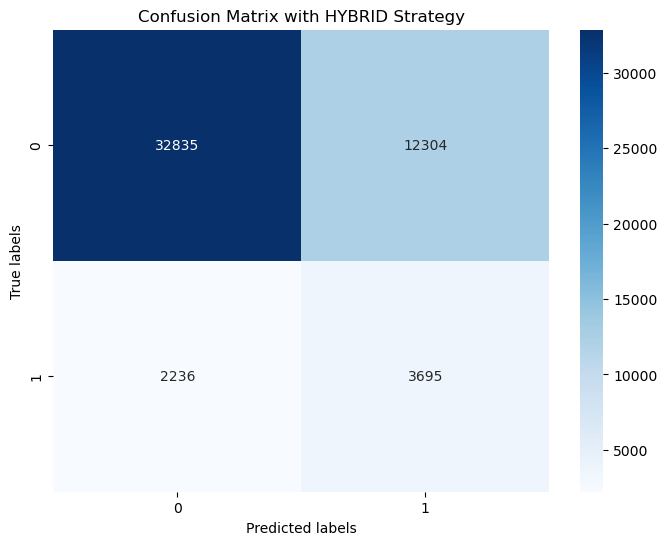

In [136]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred_xgb3)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Strategy')
plt.show()

In [112]:
# Using UNDERSAMPLING Dataset

# Instantiate the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the resampled training data
xgb_model.fit(X_undersam, Y_undersam)

# Make predictions on the testing data
y_pred_xgb4 = xgb_model.predict(X_test_unb)
y_probs6 = xgb_model.predict_proba(X_test_unb) [:, 1]

# Evaluate the model
print("Extreme Gradient Boosting (XGBoost) Classifier:")
print("Accuracy:", round(metrics.accuracy_score(y_pred_xgb4, y_test_unb) *100,2), "%")
print("Precision:", round(metrics.precision_score(y_pred_xgb4, y_test_unb) *100,2), "%")
print("Recall:", round(metrics.recall_score(y_pred_xgb4, y_test_unb) *100,2), "%")
print("F1 Score:", round(metrics.f1_score(y_pred_xgb4, y_test_unb) *100,2), "%")

Extreme Gradient Boosting (XGBoost) Classifier:
Accuracy: 67.29 %
Precision: 67.85 %
Recall: 21.38 %
F1 Score: 32.51 %


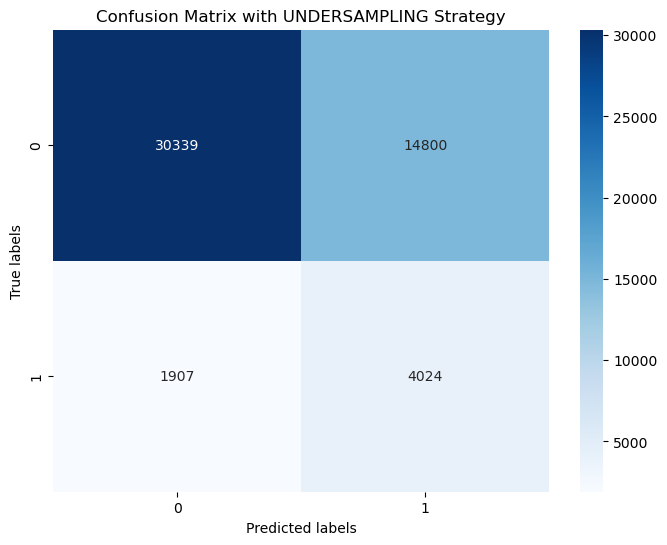

In [113]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred_xgb4)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with UNDERSAMPLING Strategy')
plt.show()

ROC AUC = 0.74


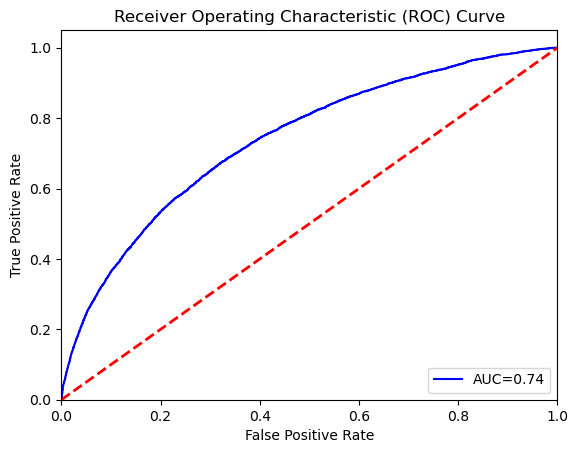

In [114]:
plot_roc(y_test_unb, y_probs6)

In [139]:
# Using Hybrid Dataset with Adjusted Threshold

xgb_model = XGBClassifier(random_state=42)

# Training the model
xgb_model.fit(X_hybrid, Y_hybrid)

thresholds = [0.3, 0.35, 0.4, 0.45]

for threshold in thresholds:
    # Predicting the model
    y_pred_xgb5 = (xgb_model.predict_proba(X_test_unb)[:,1]>=threshold).astype(int)

    # The result of the model
    print(f"\nThreshold: {threshold}")
    print("Accuracy of XG Boost Classifier Using HYBRID is:", round(metrics.accuracy_score(y_test_unb, y_pred_xgb5) *100,2), "%")
    print("Precision of XG Boost Classifier Using HYBRID is:", round(metrics.precision_score(y_test_unb, y_pred_xgb5) *100,2), "%")
    print("Recall_score of XG Boost Classifier Using HYBRID is:", round(metrics.recall_score(y_test_unb, y_pred_xgb5) *100,2), "%")
    print("F1_score of XG Boost Classifier Using HYBRID is:", round(metrics.f1_score(y_test_unb, y_pred_xgb5) *100, 2), "%")


Threshold: 0.3
Accuracy of XG Boost Classifier Using HYBRID is: 48.74 %
Precision of XG Boost Classifier Using HYBRID is: 16.66 %
Recall_score of XG Boost Classifier Using HYBRID is: 85.31 %
F1_score of XG Boost Classifier Using HYBRID is: 27.88 %

Threshold: 0.35
Accuracy of XG Boost Classifier Using HYBRID is: 55.48 %
Precision of XG Boost Classifier Using HYBRID is: 18.09 %
Recall_score of XG Boost Classifier Using HYBRID is: 80.29 %
F1_score of XG Boost Classifier Using HYBRID is: 29.52 %

Threshold: 0.4
Accuracy of XG Boost Classifier Using HYBRID is: 61.58 %
Precision of XG Boost Classifier Using HYBRID is: 19.65 %
Recall_score of XG Boost Classifier Using HYBRID is: 74.76 %
F1_score of XG Boost Classifier Using HYBRID is: 31.13 %

Threshold: 0.45
Accuracy of XG Boost Classifier Using HYBRID is: 66.8 %
Precision of XG Boost Classifier Using HYBRID is: 21.23 %
Recall_score of XG Boost Classifier Using HYBRID is: 68.61 %
F1_score of XG Boost Classifier Using HYBRID is: 32.43 %


In [136]:
# Using Hybrid Dataset with Adjusted Threshold

xgb_model = XGBClassifier(random_state=42)

# Training the model
xgb_model.fit(X_hybrid, Y_hybrid)

# Ppredicting the model
y_pred_xgb5 = (xgb_model.predict_proba(X_test_unb)[:,1]>=0.45).astype(int)

# The result of the model
print("Accuracy of XG Boost Classifier Using HYBRID is:", round(metrics.accuracy_score(y_test_unb, y_pred_xgb5) *100,2), "%")
print("Precision of XG Boost Classifier Using HYBRID is:", round(metrics.precision_score(y_test_unb, y_pred_xgb5) *100,2), "%")
print("Recall_score of XG Boost Classifier Using HYBRID is:", round(metrics.recall_score(y_test_unb, y_pred_xgb5) *100,2), "%")
print("F1_score of XG Boost Classifier Using HYBRID is:", round(metrics.f1_score(y_test_unb, y_pred_xgb5) *100, 2), "%")

Accuracy of XG Boost Classifier Using HYBRID is: 66.8 %
Precision of XG Boost Classifier Using HYBRID is: 21.23 %
Recall_score of XG Boost Classifier Using HYBRID is: 68.61 %
F1_score of XG Boost Classifier Using HYBRID is: 32.43 %


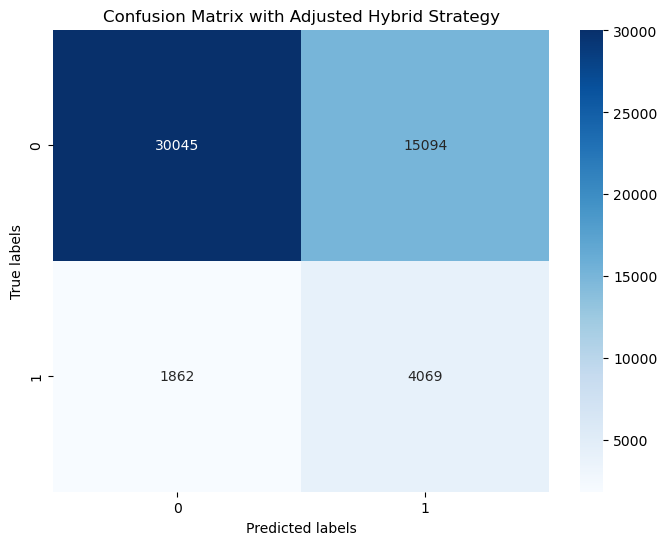

In [137]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred_xgb5)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Adjusted Hybrid Strategy')
plt.show()

In [138]:
# Using Undersampling Dataset with Adjusted Threshold

xgb_model = XGBClassifier(random_state=42)

# Training the model
xgb_model.fit(X_undersam, Y_undersam)

# Ppredicting the model
y_pred_xgb6 = (xgb_model.predict_proba(X_test_unb)[:,1]>=0.45).astype(int)

# The result of the model
print("Accuracy of XG Boost Classifier Using Adjusted Undersampling is:", round(metrics.accuracy_score(y_test_unb, y_pred_xgb6) *100,2), "%")
print("Precision of XG Boost Classifier Using Adjusted Undersampling is:", round(metrics.precision_score(y_test_unb, y_pred_xgb6) *100,2), "%")
print("Recall_score of XG Boost Classifier Using Adjusted Undersampling is:", round(metrics.recall_score(y_test_unb, y_pred_xgb6) *100,2), "%")
print("F1_score of XG Boost Classifier Using Adjusted Undersampling is:", round(metrics.f1_score(y_test_unb, y_pred_xgb6) *100, 2), "%")

Accuracy of XG Boost Classifier Using Adjusted Undersampling is: 62.12 %
Precision of XG Boost Classifier Using Adjusted Undersampling is: 19.74 %
Recall_score of XG Boost Classifier Using Adjusted Undersampling is: 73.8 %
F1_score of XG Boost Classifier Using Adjusted Undersampling is: 31.15 %


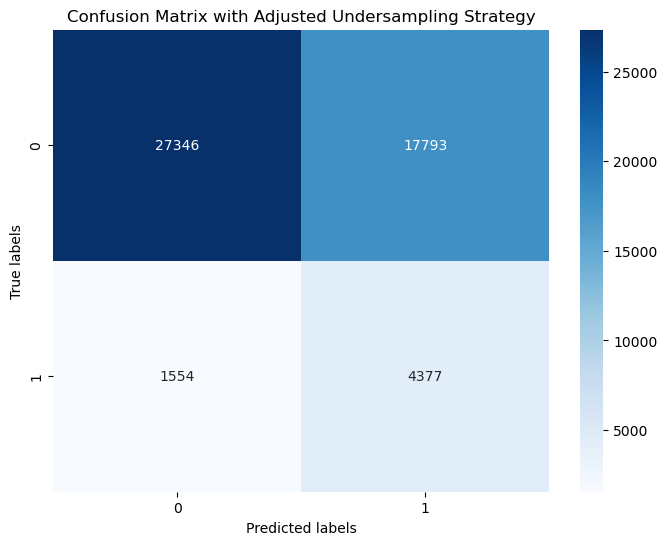

In [139]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred_xgb6)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Adjusted Undersampling Strategy')
plt.show()

In [155]:
# For Imbalance Dataset:
accuracy_imbal = round(metrics.accuracy_score(y_pred_xgb, y_test_unb) *100,2)
precision_imbal =  round(metrics.precision_score(y_pred_xgb, y_test_unb) *100,2)
recall_imbal = round(metrics.recall_score(y_pred_xgb, y_test_unb) *100,2)
f1_score_imbal =  round(metrics.f1_score(y_pred_xgb, y_test_unb) *100,2)

# For SMOTE Oversampling Dataset:
accuracy_smote = round(metrics.accuracy_score(y_pred_xgb2, y_test_unb) *100,2)
precision_smote = round(metrics.precision_score(y_pred_xgb2, y_test_unb) *100,2)
recall_smote = round(metrics.recall_score(y_pred_xgb2, y_test_unb) *100,2)
f1_score_smote = round(metrics.f1_score(y_pred_xgb2, y_test_unb) *100,2)

# For HYBRID Dataset:
accuracy_hybrid = round(metrics.accuracy_score(y_pred_xgb3, y_test_unb) *100,2)
precision_hybrid = round(metrics.precision_score(y_pred_xgb3, y_test_unb) *100,2)
recall_hybrid = round(metrics.recall_score(y_pred_xgb3, y_test_unb) *100,2)
f1_score_hybrid = round(metrics.f1_score(y_pred_xgb3, y_test_unb) *100,2)

# For Imbalance Dataset:
accuracy_undersam = round(metrics.accuracy_score(y_pred_xgb4, y_test_unb) *100,2)
precision_undersam = round(metrics.precision_score(y_pred_xgb4, y_test_unb) *100,2)
recall_undersam = round(metrics.recall_score(y_pred_xgb4, y_test_unb) *100,2)
f1_score_undersam = round(metrics.f1_score(y_pred_xgb4, y_test_unb) *100,2)

# For Adjusted Hybrid Dataset:
accuracy_adj_hybrid = round(metrics.accuracy_score(y_test_unb, y_pred_xgb5) *100,2)
precision_adj_hybrid = round(metrics.precision_score(y_test_unb, y_pred_xgb5) *100,2)
recall_adj_hybrid = round(metrics.recall_score(y_test_unb, y_pred_xgb5) *100,2)
f1_score_adj_hybrid = round(metrics.f1_score(y_test_unb, y_pred_xgb5) *100,2)

# For Adjusted Undersampling Dataset:
accuracy_adj_undersam = round(metrics.accuracy_score(y_test_unb, y_pred_xgb6) *100,2)
precision_adj_undersam = round(metrics.precision_score(y_test_unb, y_pred_xgb6) *100,2)
recall_adj_undersam = round(metrics.recall_score(y_test_unb, y_pred_xgb6) *100,2)
f1_score_adj_undersam = round(metrics.f1_score(y_test_unb, y_pred_xgb6) *100,2)

#Creating Dictionary:
metrics_dict = {
    'XGBC Imbalance': [accuracy_imbal, precision_imbal, recall_imbal, f1_score_imbal],
    'XGBC SMOTE': [accuracy_smote, precision_smote, recall_smote, f1_score_smote],
    'XGBC Hybrid': [accuracy_hybrid, precision_hybrid, recall_hybrid, f1_score_hybrid],
    'XGBC Undersampling': [accuracy_undersam, precision_undersam, recall_undersam, f1_score_undersam],
    'XGB Adjusted Hybrid': [accuracy_adj_hybrid, precision_adj_hybrid, recall_adj_hybrid, f1_score_adj_hybrid],
    'XGB Adjusted Undersampling': [accuracy_adj_undersam, precision_adj_undersam, recall_adj_undersam, f1_score_adj_undersam]
}

#Passing the dictionary into a dataframe:
xgbc_metrics = pd.DataFrame(metrics_dict)
xgbc_metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1_score']

xgbc_metrics

,XGBC Imbalance,XGBC SMOTE,XGBC Hybrid,XGBC Undersampling,XGB Adjusted Hybrid,XGB Adjusted Undersampling
Accuracy,88.54,88.29,71.78,67.49,61.77,56.87
Precision,8.62,10.45,62.57,68.45,19.68,18.44
Recall,54.13,48.02,23.33,21.61,74.34,79.26
F1_score,14.87,17.17,33.99,32.85,31.12,29.92


### Logistic Regression

In [118]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_hybrid, Y_hybrid)


#Making prediction:
y_pred6 = (lr_classifier.predict_proba(X_test_unb)[:,1]>=0.5).astype(int)
y_probs7 = lr_classifier.predict_proba(X_test_unb) [:, 1]

# Getting the metrics
print("Accuracy:", round(metrics.accuracy_score(y_pred6, y_test_unb) *100,2), "%")
print('Precision:', round(metrics.precision_score(y_pred6, y_test_unb) *100,2), "%")
print('Recall:', round(metrics.recall_score(y_pred6, y_test_unb) *100,2), "%")
print('F1_Score:', round(metrics.f1_score(y_pred6, y_test_unb) *100,2), "%")

Accuracy: 67.38 %
Precision: 70.12 %
Recall: 21.84 %
F1_Score: 33.3 %


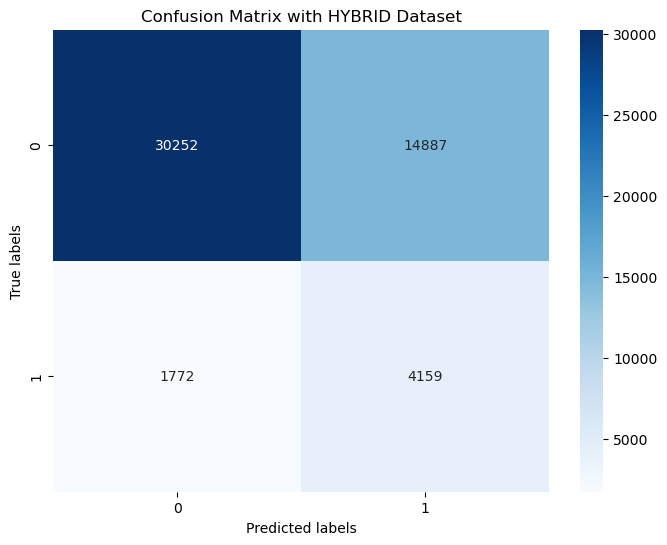

In [119]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred6)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with HYBRID Dataset')
plt.show()

ROC AUC = 0.75


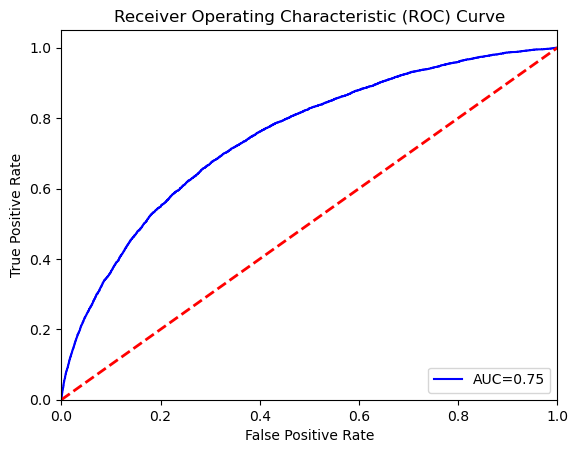

In [120]:
plot_roc(y_test_unb, y_probs7)

In [143]:
# Using Undersampling dataset
lr_classifier = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver='saga')
lr_classifier.fit(X_undersam, Y_undersam)


#Making prediction:
y_pred61 = (lr_classifier.predict_proba(X_test_unb)[:,1]>=0.45).astype(int)

# Getting the metrics
print("Accuracy:", round(metrics.accuracy_score(y_pred61, y_test_unb) *100,2), "%")
print('Precision:', round(metrics.precision_score(y_pred61, y_test_unb) *100,2), "%")
print('Recall:', round(metrics.recall_score(y_pred61, y_test_unb) *100,2), "%")
print('F1_Score:', round(metrics.f1_score(y_pred61, y_test_unb) *100,2), "%")

Accuracy: 61.04 %
Precision: 77.02 %
Recall: 19.77 %
F1_Score: 31.47 %


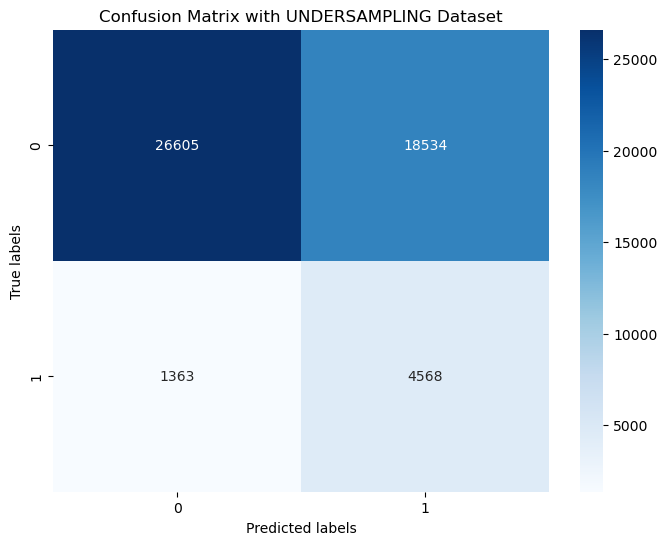

In [144]:
# Generating confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_unb, y_pred61)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with UNDERSAMPLING Dataset')
plt.show()

### ROC Curve for Various Models

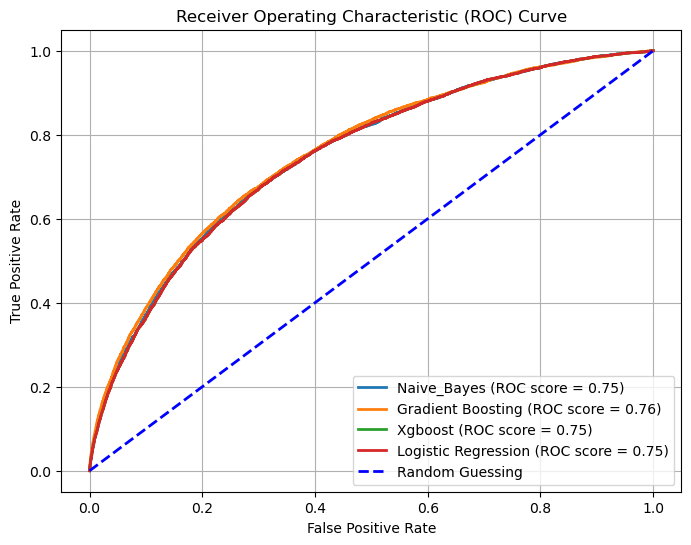

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# List of predicted probabilities for each model
y_probs = [y_probs1, y_probs5, y_probs6, y_probs7]  

# List of model names (for plotting)
model_names = ['Naive_Bayes', 'Gradient Boosting', 'Xgboost', 'Logistic Regression']  

plt.figure(figsize=(8, 6))

for y_prob, name in zip(y_probs, model_names):
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_unb, y_prob)
    
    # Compute AUC
    auc = roc_auc_score(y_test_unb, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='%s (ROC score = %0.2f)' % (name, auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Saving the best model

In [79]:
import joblib

In [80]:
joblib.dump(gb_model, 'loanmodel.pkl')

['loanmodel.pkl']

In [81]:
joblib.dump(scaler, 'loanscaler.pkl')

['loanscaler.pkl']

In [82]:
loaded_model = joblib.load('loanmodel.pkl')
loaded_scaler = joblib.load('loanscaler.pkl')